## DS 7331 Data Mining
## Lab 3
## 4/14/2019
## Mallory Hightower, Richard Farrow, and Brandon de la Houssaye

## Business Understanding 

What does it take to win a gold medal in the Olympics?  Is it lots of sweat, perseverance, good coaching, or maybe a key competitor mis-hap?  Yes, perhaps, but what role does genetics such as your height or weight play?  What about the actual sport?  Before you even begin playing (or picking your Olympic sport), does it matter what country you’re from?  Perhaps your country is known for producing downhill skiers.  Or maybe sprinters?

The team comprised of Mallory Hightower, Richard Farrow, and Brandon de la Houssaye (“team”) have set out to explore these questions. To better understand Olympic athlete physical characteristics and performance, the team will be using different clustering algorithms to investigate the relationship between an Olympic athlete's height and weight. 

The dataset being used is a Kaggle data set titled “athlete_events.csv” from the website: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results#athlete_events.csv. This dataset is hereinafter referred to as “data”. Why this data was collected initially (by the Kaggle community) is not readily apparent, but it can be surmised that the initial intent encompassed ‘intellectual curiosity’ as well as ‘establishing information for the data science community’.  However, the team selected this particular data after exploring many other forms of data (ranging from information about wine, air travel, public education data, and housing data), and the decision ultimately came down to having a robust data set that contained both categorical and continuous variables; contained a domain of interest; and ultimately met the parameters as set out in the MSDS course ‘Data Mining’.  Lastly, as mentioned, sports are fun and culturally significant.  There are a lot of resources – globally – invested towards the Olympic games in particular and the team wants to understand the games, athletes, and sports in a deeper manner.  

This dataset, which will be described in greater detail below, provides Olympic results back to 1896 (i.e., the first modern Olympics game held in Athens, Greece).  Given the sheer number of Olympic games held (summer and winter), as well as the changing of sports, athletes, and countries represented, the team is anticipating that this dataset will be sufficient for establishing the adequate variables to not only build various clustering models, but to also determine their relative efficacy.  

The team will use the silhouette score to determine whether one clustering model (or any clustering model) is effective for gaining any new insightful information from the data. Therefore, the common metric used to compare the algorithms will be the average silhouette score, an internal validation measure. The silhouette score for a particular observation is a way to measure how well that observation was clustered, so the average silhouette score is the average of all the silhouette scores for each observation in all the clusters; in effect how good the clusters are. The silhouette score ranges from -1 to 1. The closer a silhouette score is to 1 for an observation, the further away the observation is from the neighboring clusters-a good thing! You want your clusters to maximize inter-cluster similarity and minimize similarity between clusters. A silhouette score of 0 signifies that the observation is on or near a decision boundary between clusters and a negative silhouette score for an observation signifies that the observation may have been assigned to the incorrect cluster! Overall, the silhouette score measures the similarity of an observation to its cluster compared to the other clusters.  

The silhouette score is an appropriate measure for analyzing and comparing clustering model performance because it is a great interal measure of how well an observation is classified. It may be difficult to cluster the athlete height and weight, and the team desires to see if it makes sense at all to even try to cluster this data. The best way to measure this is to see how well the algorithm does at clustering by measuring the silhouette score. If all attempted algorithms routinely produce low silhouette scores, it may just mean that this data is not well suited for clustering.

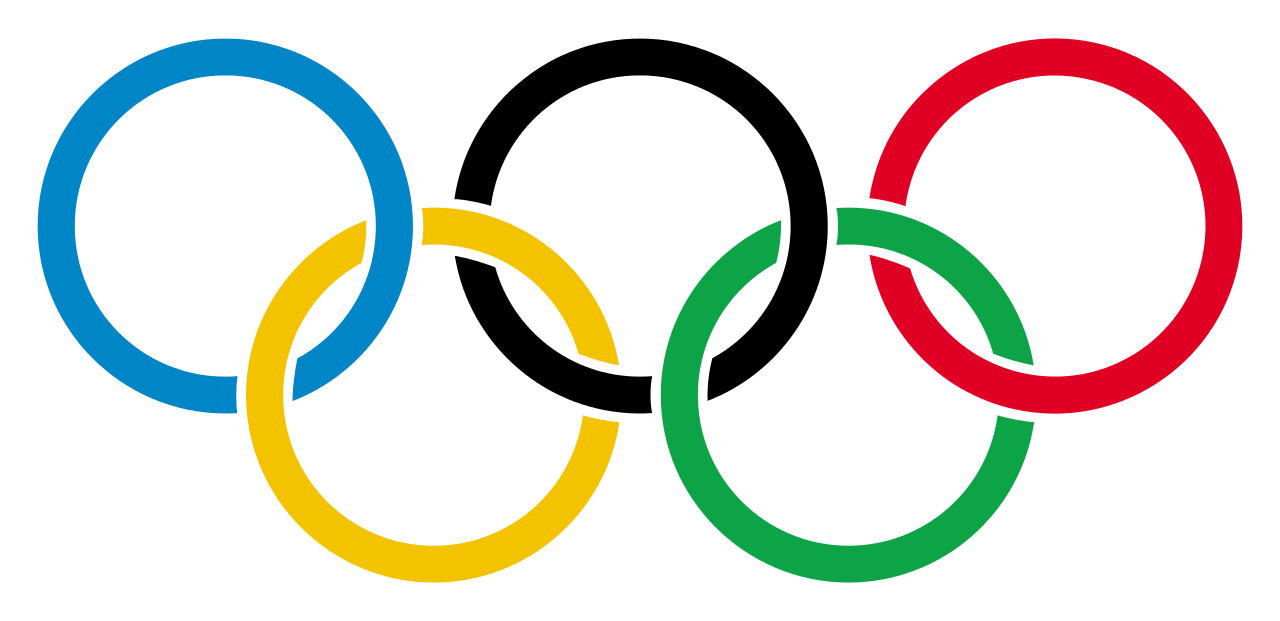

In [1]:
#Olympic rings
#image courtesy of Google
from IPython.display import Image
Image("C:\\Users\\Mallory\\Documents\\SMU\\Data Mining\\olympic rings.png", width=500, height=300)

The famous Olympic rings represent the five continents of the world that were originally united for the Olympics: 
North America, South America, Africa, Asia, Australia, and Europe.

## Data Understanding 1

### Define Variables

The data set orignially contains 15 variables and 271,116 rows of observations.  A single observation represents a particular athlete in a given sport, event, and Olympic games.  The variables are as follows:

-	ID: (Int) This is a unique identifier given to a particular athlete.  Athletes may participate in multiple, games, sports, and events, so there are repeats of the ID through the data set.
-	Name: (Object) This is the unique name given to a particular athlete.  As each ID is assigned to each unique name, the names also repeat throughout the data set.
-	Sex: (Object) An athlete is listed as either male (“M”) or female (“F”).  This is a binary category; all athletes are assigned into one of these categories.  The Olympic games establish competition within these categories (i.e., males compete against other males)
-	Age: (Float) This is the age of the athlete at that particular point in time of the observation (i.e., the age of an athlete will change from one Olympic even to the next).  Age is measured in years.
-	Height: (Float) This is the given height in centimeters for an athlete.  This is a continuous variable.
-	Weight: (Float) This is the given weight in kilograms for an athlete.  This is a continuous variable.
-	Team: (Object) This is the athlete’s team and teams are formed according to representing country (e.g., USA, Canada, etc.)
-	NOC: (Object) This is the abbreviation of a country (i.e., China = “CHN”)
-	Games: (Object) This is in reference to the Olympic event.  Olympic events are typically denoted by year of the even and whether it is summary or winter.  
-	Year: (Int) This is in reference to the Games year of occurrence 
-	Season: (Object) This is in reference to whether the Games was ‘Summer’ or ‘Winter’.
-	City: (Object) This variable details the city where the Olympic event was held.  Olympic events have historically been awarded or held within a particular host city.  
-	Sport: (Object) This variable provides the sport of competition (i.e., downhill skiing)
-	Event: (Object) Within a given sport there may be multiple events (such as distances or, for swimming, stroke)
-	Medal:  (Object) This variable indicates what medal was won.  The choices for this categorical variable include ‘Gold’, ‘Silver’, ‘Bronze’, and ‘NA’.  The last class, ‘NA’, indicates that no medal was won.

The variables considered include both continuous and categorical variables.

### Data Quality
In our quality analysis we will be looking for the following information:

- **Relevancy:** Will the attributes in the data set add value to the predictive capabilities of our model? For example, a unique identifier or the individual athlete's name will likely need to be removed from our feature list
- **Data Types:** Are the features represented with the appropriate data type? Rather than a generic object which cannot be used to compute some descriptive statistics, we will need to cast these types to an integer or a float 
- **Outliers:** Does the data set have values that are outside of the norm? Likely candidates for outliers in our data set are within Age, Height, and Weight
- **Missing Values:** Are there instances of missing values and is the missing value appropriate? We will need to determine how to impute missing values if appropriate to ensure that features are adequately calculated in our analysis
- **Duplicates:** Although duplicate observations will need to be explored; howerever, we will assume that an athlete can compete in multiple sports and/or events

In [24]:
#import necessary packages
import pandas as pd
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns

#import and view the data
df_no_edit = pd.read_csv("C:/Users/Mallory/Documents/SMU/Data Mining/LAB data/athlete_events.csv")
#replace the NaN in medal to "None"
df_test=df_no_edit
df_test["Medal"].fillna("None", inplace = True)
df_test.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


#### Relevancy:
After examining all the attributes, ID has been determined to produce little value in its predictive capabilities or relevancy for our clustering. ID is merely a way of assigning a unique ID number to each athlete. We will be dropping the ID attribute from our dataset before ongoing analysis.

We will also drop the Name attribute because we are not confident that it will contain any relevancy for our Height and Weight clustering and because it will significantly increase the data set size after one-hot-encoding. 

#### Data Types:
In reviewing the data types in our list of features, continuous variables such as Height and Weight are properly imported into the data frame as float values. All categorical values such as Team, NOC, Games, Season, City, Sport, Event, and Medal are correctly represented as objects. Lastly, the Year attribute was imported as an int. One can argue that Age is an ordinal value and should be converted to an integer; however, we do not see significant gains in performing this manipulation. 

The output below indicates missing values in Age, Height, Weight, and Medals but we will discuss this in a later section.

All the data types are also listed above and described in the Define Variables section.

All the categorical variables (dtype object) will be one-hot encoded before use in any analysis.

In [3]:
df_no_edit.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

#### Outliers
In reviewing the min, max, mean and standard deviation of the continuous variables of our data, there are no significant outliers that need to be removed. The values seem to adequately represent a normally distributed population of olympic athletes.

Although there are no international regulations around the age of a participating athlete, an article published by CNN in 2016 describes Oscar Swahn as the oldest medalist in Olympic history. Oscar was a Swedish shooter who was 72 when he competed in his third and final Olympic game in 1920. He ended his career with a total of six medals three of which were gold. Therefore, although 97 was an unexpected maximum for Age, we will assume the entry is accurate. 

In [4]:
#examine the summary statistics of the data
df_no_edit.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


#### Missing Values and Duplicates
There are quite a few missing values in our data, particularly coming from the attributes Age, Height, Weight, and Medal.

There appear to be a significant amount of missing values in Medal: 231,333. We can assume that these missing values in Medal are a mistake and simply indicate that the athlete did not receive a medal for that game and sport. We will change the NaN values in Medal to "None" in our later data manipulation.

However, Age, Height, and Weight missing values are suspect and will need to be addressed through imputation. There are 9474 missing values in Age, 60171 missing values in Height, and 62875 missing values in Weight. After experimenting with mulitple imputation methods, we determined that the best method of imputation in this case will be replacing the missing values with the mean of each respective attribute. 

Why did we choose to impute Weight, Height and Age just based off the mean of the respective variables? We tried multiple imputation methods, including imputing based off the other variables. However, we ran into a few problems. Height and Weight are similar variables, so it makes sense to use the Height to impute the Weight. Unfortunately, when the Height is missing, the Weight is also missing, and vice versa. So we could not use this method, the most logical method, to imput either variable.

We next tried to impute based off other variables, such as based off the Age and the Sex. When we compared the imputed values from this method to the simple average of the attriubutes method (comparing the mean, medians and individual values of the variables of both methods), the resulting Height, Weight, and Age variables just were not that differnet. In fact, they were almost identical in many cases. Because of this, we chose to keep our code simple and just impute the missing Age, Weight, and Height attributes based off their respective averages. We will perform these calculations in the later data manipulation section.

Concering dublicate values, a specific athlete will be mentioned several times, because an athlete can compete multiple times in multiple events and in multiple games and multiple years! If you were to just look at the data this way, there would be duplicates. But after further examining the data, the duplicates are not incorrect and are just the nature of the dataset. We will proceed with the analysis.

In [5]:
#examine the count of missing values (NaN)
print(df_no_edit.isnull().sum(axis = 0))

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


### Data Manipulation

In [2]:
# make all the edits to the data before using it!
# all these edits were discussed above

#drop the ID, Team, Name, Games, City and Event columns
# Games  is being dropped becuase year and season already contain that value
# Event is esentially a more specific sport, which we most likely will not need and will reduce later one-hot encoding
# City is also a little more granular and dropping it reduced later one-hot ecoding and processing speeds
df1 = df_no_edit.drop(['ID'], axis=1)
df1 = df1.drop(['Team'], axis=1)
df1 = df1.drop(['Event'], axis=1)
df1 = df1.drop(['Name'], axis=1)
df1 = df1.drop(['Games'], axis=1)
df1 = df1.drop(['City'], axis=1)

#impute Age, Height, Weight, and Medal
#replace NaN with mean of column
df1['Weight']=df1['Weight'].fillna(df1['Weight'].mean())
df1['Height']=df1['Height'].fillna(df1['Height'].mean())
df1['Age']=df1['Age'].fillna(df1['Age'].mean())

#replace the NaN in medal to "None"
df1["Medal"].fillna("None", inplace = True)

#replace the different medal categories to "Medal" to make it a binary classification
df1['Medal']= df1['Medal'].replace('Gold', 'Medal')
df1['Medal']= df1['Medal'].replace('Silver', 'Medal')
df1['Medal']= df1['Medal'].replace('Bronze', 'Medal')

df1 ['IsMedal'] =df1.Medal == 'Medal'
df1.IsMedal = df1.IsMedal.astype(np.int)
df1 = df1.drop(['Medal'], axis=1)


# replace the current Sex atribute with IsMale to avoid one hot encoding
# delete Sex attribute afterwards
df1['IsMale'] = df1.Sex=='M'
df1.IsMale = df1.IsMale.astype(np.int)
df1 = df1.drop(['Sex'], axis=1)

# replace current Season attribute with IsSummer to avoid one hot encoding
df1['IsSummer'] = df1.Season=='Summer'
df1.IsSummer = df1.IsSummer.astype(np.int)
df1 = df1.drop(['Season'], axis=1)

df=pd.get_dummies(df1, columns=['NOC', 'Sport'])

if 'NOC' in df:   
    del df['NOC']    
if 'Sport' in df:
    del df['Sport'] 

df.head()

,Age,Height,Weight,Year,IsMedal,IsMale,IsSummer,NOC_AFG,NOC_AHO,NOC_ALB,...,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling
0,24.0,180.00000,80.000000,1992,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,170.00000,60.000000,2012,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24.0,175.33897,70.702393,1920,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.0,175.33897,70.702393,1900,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,21.0,185.00000,82.000000,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# summary statistics of final data set
df.describe()

,Age,Height,Weight,Year,IsMedal,IsMale,IsSummer,NOC_AFG,NOC_AHO,NOC_ALB,...,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling
count,271116.000000,271116.00000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,...,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,25.556898,175.33897,70.702393,1978.378480,0.146738,0.725129,0.820874,0.000465,0.000291,0.000258,...,0.007211,0.002235,0.010556,0.000561,0.001951,0.000627,0.012556,0.014186,0.014521,0.026387
std,6.280857,9.27810,12.574690,29.877632,0.353845,0.446450,0.383459,0.021553,0.017068,0.016066,...,0.084611,0.047225,0.102201,0.023671,0.044129,0.025033,0.111346,0.118257,0.119627,0.160284
min,10.000000,127.00000,25.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,170.00000,63.000000,1960.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,175.33897,70.702393,1988.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,180.00000,75.000000,2002.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.000000,226.00000,214.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After imputing missing values, dropping irrelevant attributes, and one-hot encoding categorical variables, the final dataset contains 303 attributes and 271,116 observations. 

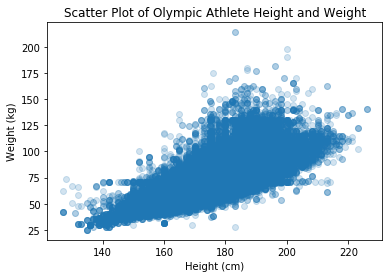

In [15]:
plt.scatter(df.Height, df.Weight, alpha=0.2)
plt.title("Scatter Plot of Olympic Athlete Height and Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

In [8]:
# shape of final df
df.shape

(271116, 303)

## Data Understanding 2

### Visualization of Attributes

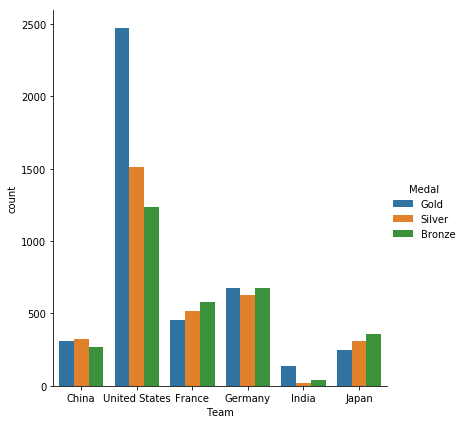

In [9]:
# Import libraries
import time                
import warnings               # To suppress warnings
import matplotlib.pyplot as plt                   
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os                    
import sys  

# Visualize 'IsMedal' for a few countries 'Team'
# use the unedited df since it contains the differernt medal types 
array = ['China', 'Germany','India','France','Japan','United States']
teams=df_no_edit.loc[df_no_edit['Team'].isin(array)]
sns.catplot(x = "Team", data=teams,kind ='count',hue='Medal',height=6,aspect=0.9)
plt.show()

Above we visualize the gold, silver, and bronze medal counts for a few selected Teams. This chart is great for comparing medal counts per team, but also for seeing which type of medal each team wins the most of. 

The United States has the most medals of these countries by a very wide margin, but it also has significantly more gold medals than any other medal. We are really great at winning gold! Germany and France have similar bronze and silver medal counts. 

The most interesting result in this chart is China. We always hear how China is really becoming a significant competitor in the Olympics, but from raw medal count, they are still really lagging behind. China is on the same medal count level as Japan. 

In [10]:
# Import and view the data use for creating the country dictionary
NOC_df = pd.read_csv("C:/Users/Mallory/Documents/SMU/Data Mining/LAB data/NOC.csv")
NOC_df.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [11]:
#create the country dictionary
country_dict = dict(zip(NOC_df.NOC, NOC_df.region))

#create new df to hold the info and map with the dictionary
df_check=df_no_edit
df_check['NOC']=df_check['NOC'].map(country_dict) 

#replace the NaN in medal to "None"
df_check["Medal"].fillna("None", inplace = True)

#replace the different medal categories to "Medal" to make it a binary classification
df_check['Medal']= df_check['Medal'].replace('Gold', 'Medal')
df_check['Medal']= df_check['Medal'].replace('Silver', 'Medal')
df_check['Medal']= df_check['Medal'].replace('Bronze', 'Medal')

df_check['IsMedal'] =df_check.Medal == 'Medal'
df_check.IsMedal = df_check.IsMedal.astype(np.int)
df_check = df_check.drop(['Medal'], axis=1)

# view the new df
df_check.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,IsMedal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [12]:
# create a new df for the instance where a medal was won (IsMedal =1 )
df_check1=df_check[df_check.IsMedal != 0]

# create new df to just group by NOC and count the IsMedal 1 values
df_check2=df_check1.groupby(['NOC','IsMedal']).IsMedal.agg('count').to_frame('c').reset_index()
df_check2 = df_check2.drop(['IsMedal'], axis=1)
df_check2.head()

# Plot the map: NOTE you must have plotly version 2.7 for this to run
data = dict(type = 'choropleth', 
           locations = df_check2['NOC'],
           locationmode = 'country names',
           z = df_check2['c'], 
           text = df_check2['NOC'],
           colorbar = {'title':'Medal Count'})
layout = dict(title = 'Olympic Medal Count by Country', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Above we plot a super awesome interactive world map heat map that shows the total medal count by country. This map also allows you to compare the country land size to medal count. Feel free to zoom in and out and use your mouse to see the medal count per country. 

This heat map is a great way to see the dominating Olympic countries in a big picture view. The dark red countries have won the most medals, and you can easily see that the United States and Russia are both dominating countries in the Olympics. Canada, Australia, China, and Japan also have high medal counts but aren't as dominating as the USA or Russia. Germany is a tiny country in comparison to Russia, but it still has won a lot of medals! 

Text(0.5,1,'Boxplot of Height (centimeters)')

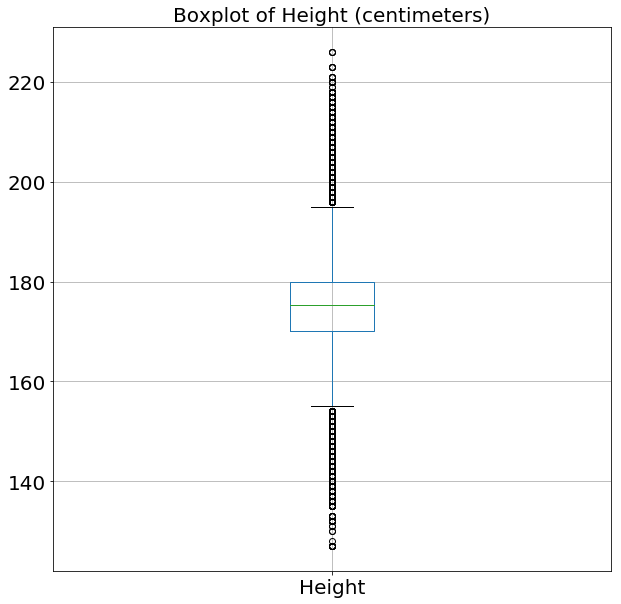

In [13]:
# box plot of Height variable
df.boxplot(column=['Height'], fontsize=20, figsize=(10, 10))
plt.title("Boxplot of Height (centimeters)", fontsize=20)

The above box plot show the continuous variable, Height, split up into quartiles. The box plot does a great job of showing
the distribution and variability of the Height variable but also other metrics, such as the median and the quartile ranges.This is why the boxplot was chosen for this variable view as opposed to other distribution plots. 

The median height of the athletes looks to be about 175 centimeters, or 5.7 feet. The Inter-quartile range is 170-180 
centimeters, which means that the middle 50% of athletes have a height between these two values.

25% of athletes have a height taller than 180 centimeters and 25% of athletes have a height shorter than 170 centimeters. 
Exlcuding outliers there is a max height of about 195 centimeters and a min height of about 155 centimeters. 
There are also several outliers, with a height as low as about 125 cm (4 ft) and a height as high as about 225 cm (7.4 ft).

These outliers are very interesting and may belong to a very short gymnast or a very tall basketball player. 
If you are interested in being an Olympian, it looks like being 5.7 feet tall is a good starting point!

Text(0.5,1,'Boxplot of Weight (kilograms)')

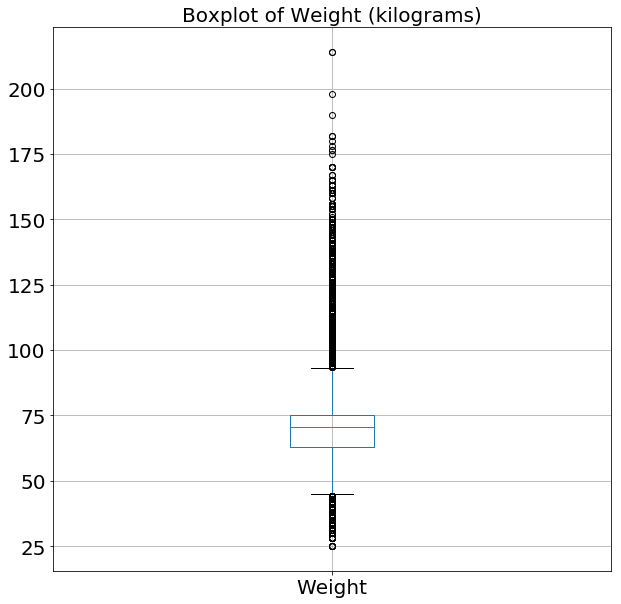

In [14]:
# box plot of Weight variable
df.boxplot(column=['Weight'], fontsize=20, figsize=(10, 10))
plt.title("Boxplot of Weight (kilograms)", fontsize=20)

The above box plot show the continuous variable, Weight, split up into quartiles. The box plot does a great job of showing
the distribution and variability of the Weight variable but also other metrics, such as the median and the quartile ranges. This is why the boxplot was chosen for this variable view as opposed to other distribution plots.

The median weight of the athletes looks to be about 70 kilograms, or 154 pounds. The Inter-quartile range is 60-75 
kilograms, which means that the middle 50% of athletes have a weight between these two values.

25% of athletes have a weight greater than 75 kg and 25% of athletes have a weight less than than 60 kg. 
Exlcuding outliers there is a max weight of about 90 kg and a min weight of about 45 kg. 
There are also several outliers, with a weight as low as about 25 kg (55 lbs) and a weight as high as about 215 kg (474 lbs).

The outlier of 215 kg is insane and actually belongs to a man named Ricardo Blas, Jr. He is from Guam and competed in the 2008 and 2012 summer olympics in Judo. Unforuntaely, he did not win gold, silver, or bronze. 

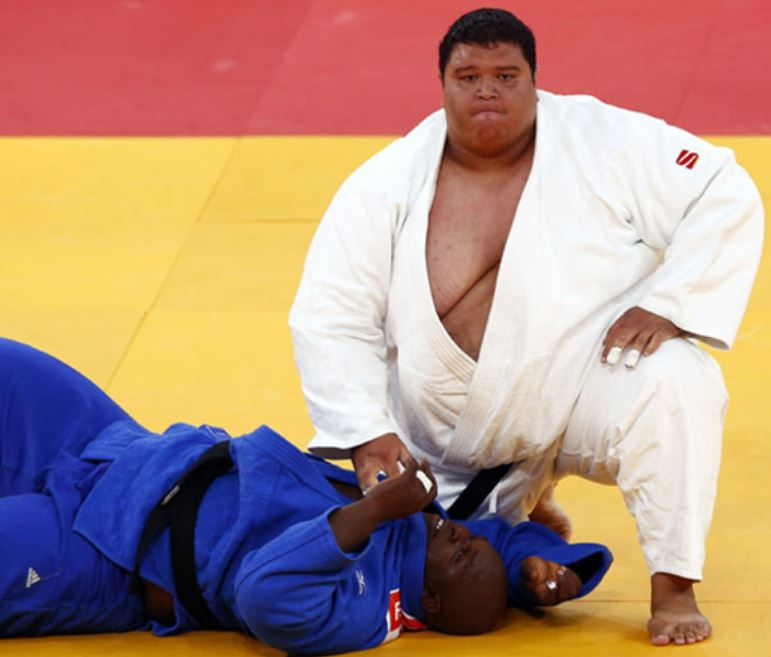

In [15]:
#athlete image
#image courtesy of Google
from IPython.display import Image
Image("C:/Users/Mallory/Documents/SMU/Data Mining/ricardo.JPG", width=300, height=300)

Here is the heaviest Olympic athlete of all time, Ricardo Blas, Jr.

Text(0.5,1,'Boxplot of Age (years)')

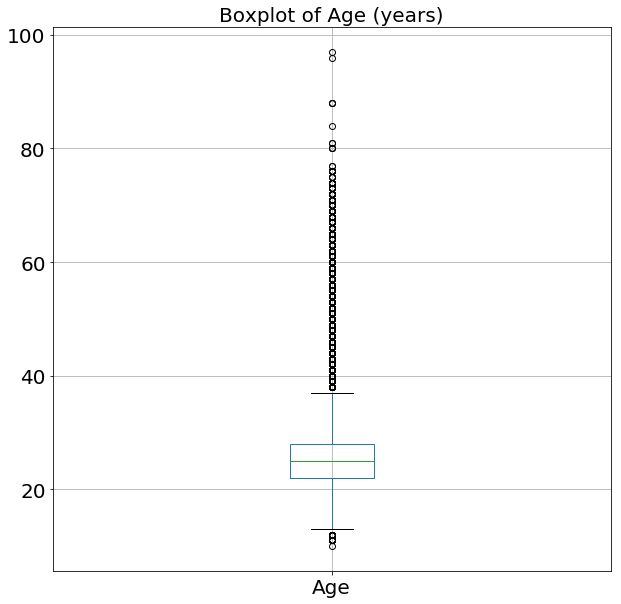

In [16]:
# box plot of Age variable
df.boxplot(column=['Age'], fontsize=20, figsize=(10, 10))
plt.title("Boxplot of Age (years)", fontsize=20)

The above box plot show the categorical variable, Age, split up into quartiles. The box plot does a great job of showing
the distribution and variability of the Weight variable but also other metrics, such as the median and the quartile ranges. This is why the boxplot was chosen for this variable view as opposed to other distribution plots.

The median age of the athletes looks to be about 25 years. The Inter-quartile range is about 22-28 
years, which means that the middle 50% of athletes have an age between these two values.

25% of athletes are older 28 years and 25% of athletes are younger than than 22 years. 
There are also several outliers, with an age as young as about 10 years and an age as old as about 97 years.

The outlier of 10 years old is extremely puzzling. This athlete is Dimitrios Loundras who competed for Greece in the 1896 summer games and won bronze in gymnastics! It makes sense that the very young athlete is a gymnast, because younger gymnasts tend to be better gymnasts (less weight, more flexible, etc.). This reminds me of the Chinese scandal not too long ago of faking birth certificates for their female gymnasts, so the girls were much younger and had a higher potentional of winning. Although there is no age limit for the Olympics, certain sports have lower age limits. One of those sports is gymnastics. It was ruled in 1997 that the lower age limit for gymnasts is 16.

If you are at the ripe old age of 97 and want to compete in the Olympics, you have hope! 
John Quincy Adams Ward, age 97, competed for USA in the 1928 summer games in the extremly intense and arduous sport of Art Competitions.

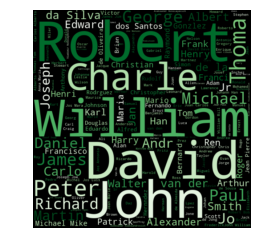

In [17]:
# Create Wordcloud of the Names variable
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=600, colormap="Greens").generate(' '.join(df_no_edit['Name']))
plt.figure()
 
# Display the Wordcloud:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

The above Wordcloud shows the relative frequency of the names of all the Olympic athletes. The more often a name occurs, the larger it is in size in respect to the other names. The largest names displayed are the most common names for Olympic athletes. 

Robert, David, William, Charle, James, and George are all very common Olympic athlete names. These names are traditional Anglo-Saxon white male names, which suggests that white is the most common race of Olympic athletes. Not only does this image reflect the most common race of Olympic athletes, it also overwhelmingly reflects the most common gender: male. 

The Wordcloud was chosen to visualize the Names attribute because names are categorical variables, which are often more difficult to visualize. The Wordcloud is not only a fun way to analyze this categorical variable, but it also demonstrates a lot about the athletes! Wordclouds are not pefect though, and because they input the entire athlete's name, you see words such as "Jr." and "de la." The Wordcoud is still great for the Names attribute because from this simple Wordcloud, we can generally infer that most Olympic athletes are white males.

Text(0.5,1,'Count of Male and Female Olympic Athletes')

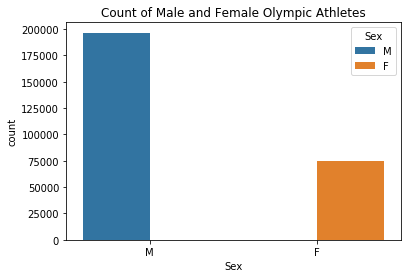

In [18]:
import seaborn as sns
sns.countplot(x="Sex",hue="Sex", data=df_no_edit).set_title("Count of Male and Female Olympic Athletes")

The above plot shows the count of male and female Olympic athletes using the Sex attribute. A bar chart was chosen for this plot because gender is esentially a boolean variable on the same scale, so a bar chart is the easiest way to visualzie the counts side by side.

It is obvious from this plot that there have been many more male Olympic athletes than female Olympic athletes. There have been approximately 200,000 male Olympic athletes and approximately 75,000 female Olympic athletes since the 1896 Olympics. In fact, females were not competing in the Olympics until 1900. This plot further demonstrates that women are not as well represented as men are in the Olympics. While this fact is not necessarily good or bad, it is an interesting facet of the data.

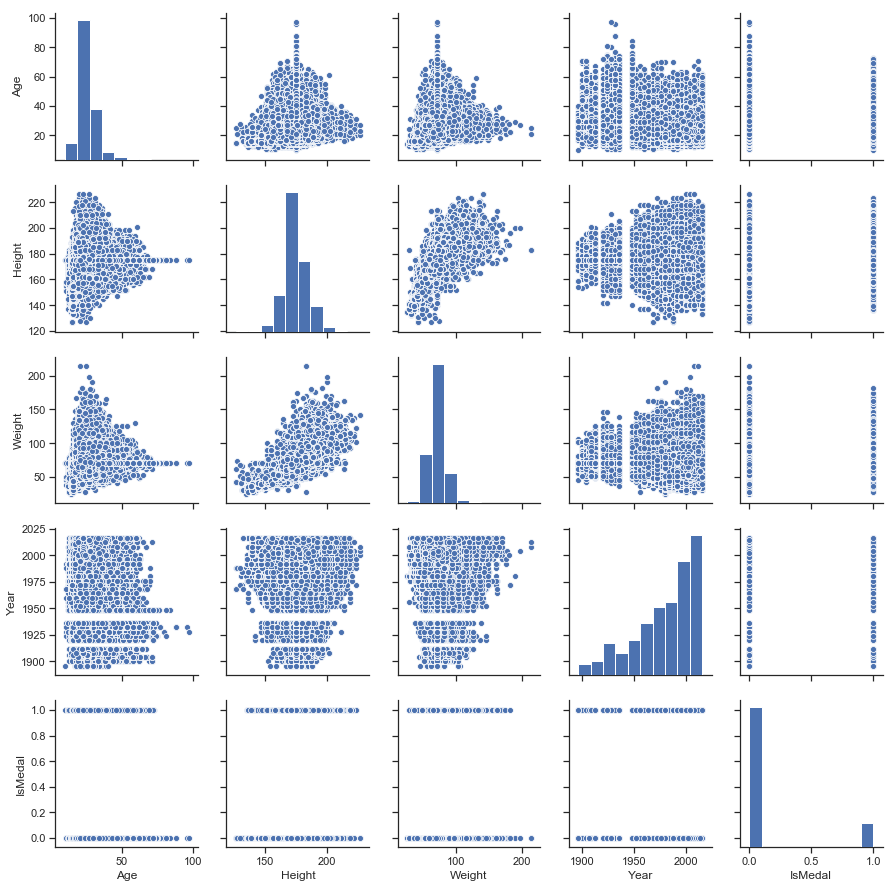

In [19]:
#examine the histograms and the scatterplots
dfb=df_no_edit
dfb['Weight']=dfb['Weight'].fillna(dfb['Weight'].mean())
dfb['Height']=dfb['Height'].fillna(dfb['Height'].mean())
dfb['Age']=dfb['Age'].fillna(dfb['Age'].mean())
dfb = dfb.drop(['ID'], axis=1)
dfb["Medal"].fillna("None", inplace = True)

sns.set(style="ticks")
sns.pairplot(dfb)
plt.show()

Above is a histogram and scatterplot matrix of the data. This type of plot is useful because you can easily and quickly see the relationships between all the combinations of continuous variables. You can also see the distribution of the continuous variables and see if there are any abnormal distributions that require a second look.

From the above charts, it looks like the data is normally distributed (with the exception of year). This is good to know, but even if the data was not normally distributed, the central limit theorem would kick in with a population as large as this data set. 

As far as relationships between attributes, it only looks like the Weight and Height attributes are correlated. The correlation also looks like a strong positive correlation: as weight increases height increases and vice versa. This relationship makes sense intuitively but it is nice to have it confirmed by the data. 

The only other obvious conclusion from the above charts is that there is data missing around year 1940 and around 1915. 
It turns out that the world does not celebrate with sports and games during major times of conflict. 
The 1916 Summer Olympics were cancelled for World War One and the Summer and Winter Olympics of 1940 and 1944 were cancelled for World War Two. These are the only years that the modern Olympics have been cancelled. 

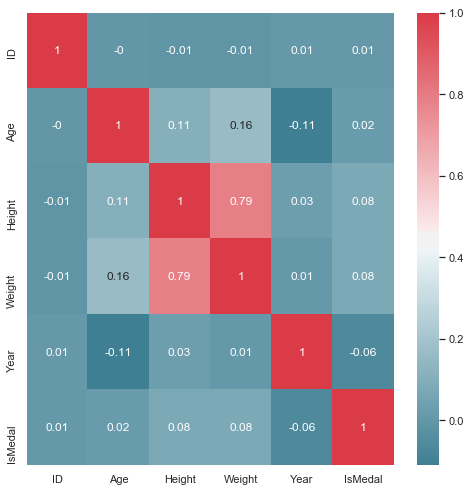

In [20]:
#look at the heat map of the correlation matrix using seaborn
sns.set(style="darkgrid") # styles for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True) # color mapping

f, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(round(df_no_edit.corr(),2), cmap=cmap, annot=True)

f.tight_layout()

Another great plot is the above heat map correlation matrix. This type of plot is useful when you are looking at several
variables and just want to have a quantifiable correlation value. If variables are highly correlated it may be a good 
idea to leave out one of the variables from a model and keep the model as simple as possible. You do not need 
multiple variables explaining the same variance in the response variable. The heat map is especially useful because the human eye
is able to immediately distinguish which variables are highly correlated with the colors and the color scale.

In this plot, the dark red cells are highly correlated and the dark blue cells are not correlated. The diagonal cells have a correlation
coefficient of 1, which means perfect correlation (which is assumed because the diagonal is the variable plotted against itself). 

The plot confirms that the only variables that are highly correlated are height and weight. The correlation coefficient is 0.79, which means
a high positive correlation between height and weight. 
Although this is a high correlation, it is not high enough to warrant removing one of the variables from a future model. 
A good rule of thumb is to be wary of variables who have a correlation coefficient greater than 0.8.
The next highest correlated variables are age and weight. With a correlation coefficient of 0.16, these two variables are only slightly 
positively correlated. 

Age and year, on the other hand, are very slightly negatively correlated with a correlation coefficent of -0.11. This indicates that there
are slightly fewer older athletes participating in the Olympics as time goes on. Over time, this may push the median age of Olympic
athletes down.

With this chart we are able to quickly quantify correlations between our continuous variables, a necessary step for future
model development. 

Text(0.5,1,'Age Distribution per Team')

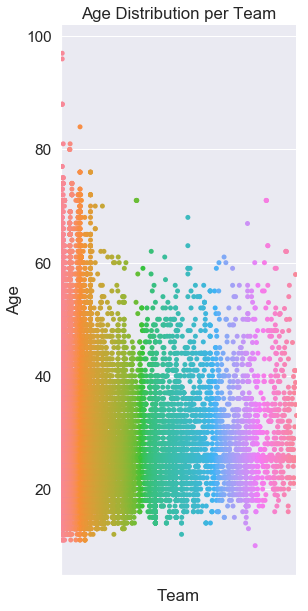

In [21]:
#visualize Team and Age attributes 
sns.set(font_scale=1.4)
plot=sns.catplot(x="Team", y="Age", data=df_no_edit)
plot.set(xticklabels=[])
plot.fig.set_size_inches(10,10)
plt.title('Age Distribution per Team')

The above catplot was chosen for this data visualization because both Team and Age are categorical variables and
the seaborn catplot is a great way to plot categorical variables. The labels for each specific team on the X-axis were left out becuase there are too many teams to have a normal looking graph with a legible X-axis. 

The graph clearly shows that the age distribution for teams varies. Some countries have athletes around the same age, while other countries, specifically the country closest to the vertical axis, have a larger age distribution. We already know that the country with the largest age distribution
is USA with the 97 year old Olympic sculptor! This graph demonstrates that not all countries have the same aged Olympic athletes. If you are a 65 yr old Olympic athlete, you may be more likely to come from one of the countries closer to the vertical axis. It turns out that your age as an Olympic athlete may be related to what country you are from!

Text(0.5,1,'Medals per Sex Over Time')

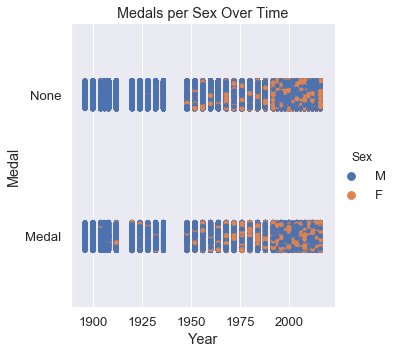

In [22]:
#visualize how the medal count has changed between genders over time 
sns.set(font_scale=1.2)
sns.catplot(x="Year", y="Medal", hue="Sex", data=df_no_edit)
plt.title('Medals per Sex Over Time') 

The above chart is an awesome graph for visualizing the difference in medal counts between men and women over time. The catplot was chosen because the Medal and Sex attributes are categorical variables, and the seaborn catplot helps visualize these attributes well. Stacking the different medal types on top of each other allows you to easily compare the different medal categories over time.

It is really neat to see the orange (F) creep up on the blue (M) as the years progress and more females participate in the Olympics. We already mentioned that the first year a female participated in the Olympics was 1900, which is confirmed in this graph. It looks like she won a Silver medal! 

It also looks like the period between 1920-1938 was an Olympic period mostly dominated by males. Females were winning very few medals during this period. This is the period right after World War One and leading up to World War Two so it is highly possible that the women needed to stay home with the family during these tumultuos and uncertain years. A female during these years would be much less likely to win any type of medal. As the years progress, females are much more likely to win an Olympic medal. This knowledge is helpful for predicting the medal count based on gender and year.

Text(0.5,1,'Height Distribution for Medals')

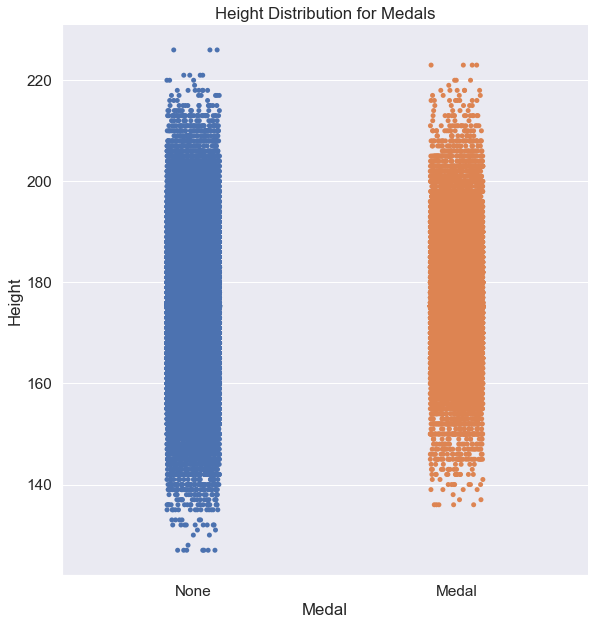

In [23]:
#visualize Medal and Height attributes 
sns.set(font_scale=1.4)
plot=sns.catplot(x="Medal", y="Height", data=df_no_edit)
plot.fig.set_size_inches(10,10)
plt.title('Height Distribution for Medals') 

The above catplot was chosen for this visualization because it plots the Medal categorical attribute in a way that is easy to 
understand and see with the medal categories side by side. It also shows the distribution and any outliers.

This plot indicates that there is an ideal height for Olympic athletes in the densely populated center. If you are just predicting medal category by height, it would be hard to classify between gold, bronze, and silver, since those height distributions are about equal. However, if you are on either side of that ideal height distribution, which is about 150 cm to 210 cm (about 5 ft-6.9 ft), you are more likely to be in the none medal category. Neither very short athletes nor very tall athletes are taking home gold, silver, or bronze. 

However, height is still relative. Because to me, 6.9 ft. tall is plenty tall! I can't imagine someone much taller than that being very coordinated, athletic, or healhty enough to be an Olympic athlete.

Text(0.5,1,'Weight Distribution for Medals')

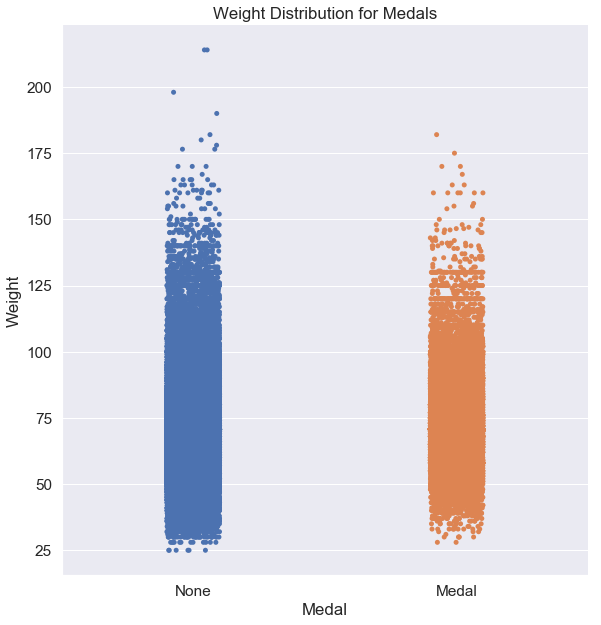

In [24]:
#visualize Medal and Weight attributes 
sns.set(font_scale=1.4)
plot=sns.catplot(x="Medal", y="Weight", data=df_no_edit)
plot.fig.set_size_inches(10,10)
plt.title('Weight Distribution for Medals') 

The above catplot was chosen for this visualization because it plots the Medal categorical attribute in a way that is easy to 
understand and see with the medal categories side by side. It also shows the distribution and any outliers.

This plot has similar conclusions as the height distribution for medals. There is an ideal weight range, around 40 kg-115 kg, for 
an Olympic athlete winning gold, bronze, or silver medals.

The none medal category has a larger distribution and has more outliers on the upper side of the weight spectrum. This suggests that 
you are a heavier athlete, you are less likely to win gold, silver, or bronze.

However, because the gold, silver, and bronze weight distributions are nearly identical, it is not enough to use only weight to predict 
what category of medal an athlete will win. There must be additional attributes in the model. 

Additionally, the simlilarity of the height and weight distributions for the different medal categories further confirms that height 
and weight are highly correlated. This will be interesting for our clustering analysis of height and weight!

## Modeling and Evaluation 1

We will be clustering on two of our continuous attributes in the dataset: Weight and Height. We chose these attributes because we are interested in how a clustering algorithm will choose to organize them! From the visualizations presented in the previous section, there is no clear or obvious natural separation in the data.

First we select a random subsample of our data (setting the seed for reproducible results). We are choosing a random subsample in order to achieve faster algorithm performance. After performing a sample size calculation with a 99% confidence level and a confidence interval of 1% for our original data set of 271,116 observations, we arrived at a minimum sample of 15,679 observations. We are choosing to use a random subsample of 20,000 observations just to be on the safe side to ensure we are getting an accurate reprentation of our dataset as a whole.

In [25]:
# select the features to cluster on and select a random subsample from the dataset

from sklearn.preprocessing import StandardScaler

sample_size=20000
Var = ['Height','Weight']
Clus_Var = df[Var].sample(n=sample_size, random_state=1)

# scale the features since they have different units
scl_obj = StandardScaler()
scl_obj.fit(Clus_Var)
df_clus = scl_obj.transform(Clus_Var)

# ensure you have the desired number of observations
df_clus.shape

(20000, 2)

### KMeans Clustering Algorithm

The KMeans clustering algorithm is a great first clustering algorithm to apply to data. The algoirthm assigns observations to a pre-determined number of clusters based on the observation's distance from the cluster centroids. 

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# choose the different numbers of clusters to examine
range_n_clusters = [2, 3, 4, 5, 6]
range_init = ['k-means++']

# Calculate the silhouette score for each range_n_clusters.
    # The silhouette score is a way to measure the distance of the clusters and how well an observation has been classified into 
    # a cluster. The range is -1 to 1 with 1 being great and -1 being awful.
# Compute the silhouette scores for each sample
for n_clusters in range_n_clusters:
    for init in range_init:
        KMeans_cluster = KMeans(n_clusters=n_clusters, random_state=1, init=init)
        cluster_labels = KMeans_cluster.fit_predict(df_clus)
        silhouette_avg = silhouette_score(df_clus, cluster_labels)
        print("For n_clusters =", n_clusters, "and initialization", init,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 and initialization k-means++ The average silhouette_score is : 0.49067727170238884
For n_clusters = 3 and initialization k-means++ The average silhouette_score is : 0.5124763571840629
For n_clusters = 4 and initialization k-means++ The average silhouette_score is : 0.47366420486651195
For n_clusters = 5 and initialization k-means++ The average silhouette_score is : 0.45820082400449663
For n_clusters = 6 and initialization k-means++ The average silhouette_score is : 0.45732622255891153


From running the KMeans algorithm by varying the number of clusters using 5 different clusters, we achieved a minimum average silhouette score of 0.457 with 6 clusters and a maximum average silhouette score of 0.512 with 3 clusters. As we increase the number of clusters above 3, the silhouette score decreases, as well as if we decrease the number of clusters below 3. 3 looks to be the optimal number of KMeans clusters for this dataset, as the closer a silhouette score is to 1 for an observation, the further away the observation is from the neighboring clusters-a good thing! 

### DBSCAN Clustering Algorithm

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This algorithm is a distance based algorithm that uses a specified density metric (like euclidean distance, which we will apply). DBSCAN performs well on numerical, continuous data as well as data that has clusters of similar density. 

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

# choose the different values for eps and mpts to examine
eps_range = [2,1,0.5]
mpts_range = [10,100,500]

# Calculate the silhouette score for each range_n_clusters.
    # The silhouette score is a way to measure the distance of the clusters and how well an observation has been classified into 
    # a cluster. The range is -1 to 1 with 1 being great and -1 being awful.
# Compute the silhouette scores for each sample
for eps in eps_range:
    for mpts in mpts_range:
        DBSCAN_cluster = DBSCAN(eps=eps, metric='euclidean',
        metric_params=None, min_samples=mpts, n_jobs=None, p=None)
        cluster_labels = DBSCAN_cluster.fit_predict(df_clus)
        silhouette_avg = silhouette_score(df_clus, cluster_labels)
        print("For eps =", eps, "and mpts =", mpts,
          ". The average silhouette_score is :", silhouette_avg)

For eps = 2 and mpts = 10 . The average silhouette_score is : 0.856831989737317
For eps = 2 and mpts = 100 . The average silhouette_score is : 0.8112978046648308
For eps = 2 and mpts = 500 . The average silhouette_score is : 0.7758934894770739
For eps = 1 and mpts = 10 . The average silhouette_score is : 0.7777108833107946
For eps = 1 and mpts = 100 . The average silhouette_score is : 0.7161630181587597
For eps = 1 and mpts = 500 . The average silhouette_score is : 0.6725527662399939
For eps = 0.5 and mpts = 10 . The average silhouette_score is : 0.712200274727012
For eps = 0.5 and mpts = 100 . The average silhouette_score is : 0.6370800252961473
For eps = 0.5 and mpts = 500 . The average silhouette_score is : 0.5687560102884834


Here we are varying two parameters of the DBSCAN algorithm and calculating the average silhouette score for each cluster.
The two parameters that we are changing are eps (the maximum distance between two observations for them to be considered as in the same cluster) and min_samples (the number of samples in a neighborhood needed to create a cluster). 

If eps is too large, it could result in an algorithm that underfits the data (all the data would be in one giant cluster). If eps is too small, much of the data will be considered outliers and will not be clustered. Eps must have a range of values between 2 and n_samples-1.

Min_samples must be > or = the number of features in the data set + 1. Since we are clustering on two features, min_samples >= 3. Larger values of min_samples perform better when the dataset is very large (like ours) and when the dataset has significant noise.

After running the DBSCAN algorithm, we obtained a maximum average silhouette score of 0.85 with an eps=2 and min_samples=10 and a minumum average silhouette score of 0.56 with an eps=0.5 and min_samples=500. It seems that as you decrease eps and increase min_samples you achieve a lower (worse) silhouette score.  

DBSCAN algorithm takes significantly longer to run than KMeans, but it produces much better cluster results as measured by the silhouette score.

### Agglomerative Clustering Algorithm
#### Part 1

The agglomerative clustering algorithm is a form of hierarchical clustering that uses the "bottom-up" approach: each observation starts in its own cluster and pairs of clusters are merged as you move up the hierarchy of clusters. The point of hierarchical clustering is to build a hierarchy of clusters by recursively merging the pair of clusters that minimally increases a given linkage distance by comparing the dissimilarity between sets of observations.

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

# choose the different values for n_clusters, affinity, and linkage
n_clusters_range = [3, 4, 5]
affinity_range = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkage_range= ['complete', 'average']

# Calculate the silhouette score for each range_n_clusters.
    # The silhouette score is a way to measure the distance of the clusters and how well an observation has been classified into 
    # a cluster. The range is -1 to 1 with 1 being great and -1 being awful.
for n_clusters in n_clusters_range:
    for affinity in affinity_range:
            for linkage in linkage_range:
                AGG_cluster = AgglomerativeClustering(affinity=affinity,
                connectivity=None, linkage=linkage, memory=None, n_clusters=n_clusters)
                cluster_labels = AGG_cluster.fit_predict(df_clus)
                silhouette_avg = silhouette_score(df_clus, cluster_labels)
                print("For n_clusters =", n_clusters, ", affinity =", affinity, " and linkage =", linkage,
                  ". The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 , affinity = euclidean  and linkage = complete . The average silhouette_score is : 0.481046767618906
For n_clusters = 3 , affinity = euclidean  and linkage = average . The average silhouette_score is : 0.7839162112817228
For n_clusters = 3 , affinity = l1  and linkage = complete . The average silhouette_score is : 0.4287808821424789
For n_clusters = 3 , affinity = l1  and linkage = average . The average silhouette_score is : 0.6498394805569327
For n_clusters = 3 , affinity = l2  and linkage = complete . The average silhouette_score is : 0.481046767618906
For n_clusters = 3 , affinity = l2  and linkage = average . The average silhouette_score is : 0.7839162112817228
For n_clusters = 3 , affinity = manhattan  and linkage = complete . The average silhouette_score is : 0.4287808821424789
For n_clusters = 3 , affinity = manhattan  and linkage = average . The average silhouette_score is : 0.6498394805569327
For n_clusters = 3 , affinity = cosine  and linkage = complete . T

Above we run the agglomerative clustering algorithm and vary 3 parameters within the algorithm: n_clusters, affinity, and linkage.

N_clusters is the number of clusters that you want the algorithm to find. Similar to how we pre-choose the number of clusters we want from KMeans.
Affinity is the metric used to compute the linkage.
Linkage determines which distance to use between sets of observations. 

Note: we are not using the Ward linkage in this run because we want to try out different affinities. If the linkage is 'ward' then we can only use the 'euclidean' affinity. 

After running the above agglomerative clustering algorithm and varying the parameters, we achieved a maximum average silhouette score of 0.7839 with n_clusters = 3 , affinity = l2  and linkage = average and with n_clusters = 3 , affinity = euclidean  and linkage = average. We achieved a minimum average silhouette score of  0.136 with n_clusters = 4, affinity = cosine  and linkage = complete.

Overall, the agglomerative clustering algorithm runs slightly slower than KMeans but faster than DBSCAN. It also produces some VERY low silhouette scores.

#### Part 2
Run the agglomerative clustering algorithm with the 'ward' linkage. Could not be run earlier due to the way we were varying the parameters. If the linkage is 'ward' then we can only use the 'euclidean' affinity. 

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

# choose the different values for n_clusters, affinity, and linkage
n_clusters_range = [3, 4, 5]
affinity_range = ['euclidean']
linkage_range= ['ward']

# Calculate the silhouette score for each range_n_clusters.
    # The silhouette score is a way to measure the distance of the clusters and how well an observation has been classified into 
    # a cluster. The range is -1 to 1 with 1 being great and -1 being awful.
for n_clusters in n_clusters_range:
    for affinity in affinity_range:
            for linkage in linkage_range:
                AGG_cluster = AgglomerativeClustering(affinity=affinity,
                connectivity=None, linkage=linkage, memory=None, n_clusters=n_clusters)
                cluster_labels = AGG_cluster.fit_predict(df_clus)
                silhouette_avg = silhouette_score(df_clus, cluster_labels)
                print("For n_clusters =", n_clusters, ", affinity =", affinity, " and linkage =", linkage,
                  ". The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 , affinity = euclidean  and linkage = ward . The average silhouette_score is : 0.46616384032062613
For n_clusters = 4 , affinity = euclidean  and linkage = ward . The average silhouette_score is : 0.4052275964193173
For n_clusters = 5 , affinity = euclidean  and linkage = ward . The average silhouette_score is : 0.40329526718195474


After running the above agglomerative clustering algorithm with affinity=euclidean and linkage=ward and varying the n_clusters, we achieved a maximum average silhouette score of 0.46 with n_clusters=3. We achieved a minimum average silhouette score of 0.40 with n_clusters > 4. Interestingly, when n_clusters > 4 the silhouette score drops off and stays constant at a low average silhouette score of about 0.40.

## Modeling and Evaluation 2

### Comparing Clustering Algorithms

We clustered a random subsample of 20,000 observations of the Height and Weight attributes in our dataset. We compared three clustering algorithms: KMeans, DBSCAN, and Agglomerative Hierarchical clustering. 

The common metric we used to compare the algorithms is the average silhouette score, an internal validation measure. As mentioned previously, the silhouette score for a particular observation is a way to measure how well that observation was clustered, so the average silhouette score is the average of all the silhouette scores for each observation in all the clusters, in effect how good the clusters are. The silhouette score ranges from -1 to 1. The closer a silhouette score is to 1 for an observation, the further away the observation is from the neighboring clusters-a good thing! You want your clusters to mximize inter-cluster similarity and minimize similarity between clusters. A silhouette score of 0 signifies that the observation is on or near a decision boundary between clusters and a negative silhouette score for an observation signifies that the observation may have been assigned to the incorrect cluster! Overall, the silhouette score measures the similarity of an observation to its cluster compared to the other clusters.

From the three algorithms we compared, KMeans ran the fastest, then Agglomerative Hierarchical, then DBSCAN with a significantly longer run time. 

However, DBSCAN consistently produced a higher average silhouette score than the other models, with a highest average silhouette score of about 0.85 and a lowest average silhouette score of 0.56. The highest silhouette score of 0.85 was achieved with an eps=2 and min_samples=10. 

We used multiple parameter combinations for the Agglomerative Hierarchical clustering algorithm, some combinations with very low average silhouette scores but some with higher scores. Overall, varying the parameters in the Agglomerative Hierachical model produced the greatest variance in silhouette scores, with a score as low as 0.13! The highest average silhouette score achieved with the Agglomerative Hierarchical algorithm was about 0.78 with 3 clusters and the 'average' linkage.

KMeans did not perform well on clustering our data, with a max silhouette score of about 0.51, which was achieved with three clusters.

After looking at the silhouette scores of each model and the different parameters tunings, we are able to see which model achieves the most optimal clusters for our data, and also which parameter combinations achieve the best results for each model.
The DBSCAN algorithm had the highest silhouette score, and we will be able to visualize how many clusters the algorithm creates in the next section. 

After looking at the silhouette scores for KMeans and Agglomerative Hierarchical (because these algorithms allow you to choose the number of clusters at the model onset), we were able to determine the ideal number of clusters. The ideal number of clusters for KMeans is three clusters and the ideal number of clusters for Agglomerative Hierarchical is also three clusters. 

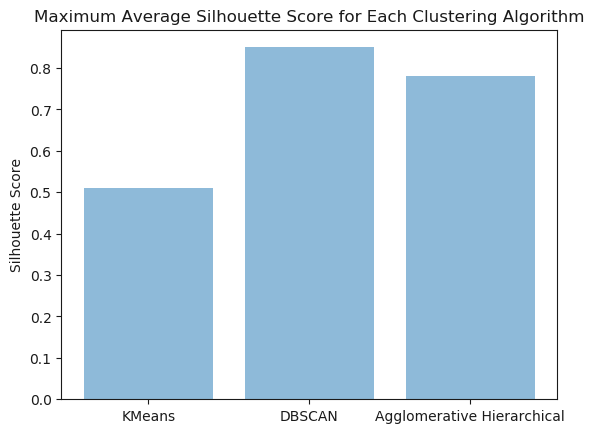

In [30]:
# visualize different clustering algorithm performance
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ['KMeans', 'DBSCAN', 'Agglomerative Hierarchical']
y_pos = np.arange(len(objects))
performance = [0.51, 0.85, 0.78]

plt.bar(y_pos,performance,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Silhouette Score')
plt.title('Maximum Average Silhouette Score for Each Clustering Algorithm')
 
plt.show()

In the above bar chart, we visualize the maximum average silhouette scores for each clustering algorithm. The closer the silhouette score is to 1 the better the clustering of the data.

You can see that DBSCAN perfromed the best with a maximum average silhouette score of 0.85. Agglomerative hierarchical has a close second place with a maximum average silhouette score of 0.78. KMeans does not cluster the data very well and produces a maximum average silhouette score of 0.51.

### Determining Number of Clusters

#### KMEANS:
We will examine a scree plot for KMeans to determine a suitable number of clusters. Scree plots, also known as the elbow method, is a graphical method of selecting the optimal number of clusters based on reduction in variance. The location of the elbow on the graph signifies the optimal number of clusters!

When we varied parameters in the Modeling and Evaluation 1 section we compared the resulting sihouette scores and used the silhouette score as a method for choosing the optimal number of clusters. If by varying the n_clusters in KMeans clustering we achieve higher silhouette scores, we can assume those respective n_clusters are the optimal number of clusters. We will be comparing the results found by varying the parameters and calculating the silhouette score for KMeans to the output of the scree plot to see if they agree!

#### DBSCAN:
For DBSCAN we do not need to specify the number of clusters: the algorithm takes care of that. We instead used different values of eps and mpts and let the algorithm choose the number of clusters. We chose the optimal number of clusters for DBSCAN based off the combination of parameters that produced the highest silhouette score. We will visualize the number of clusters in the following section. 

However, we will plot the K Nearest Neighbors plot to see if it agrees with our eps and min_samples parameters chosen in the parameter tuning.

#### AGGLOMERATIVE HIERARCHICAL:
For agglomerative hierarchical clustering we also chose the number of clusters based off the parameter tunings that produced the highest silhouette score.

#### KMeans Scree Plot

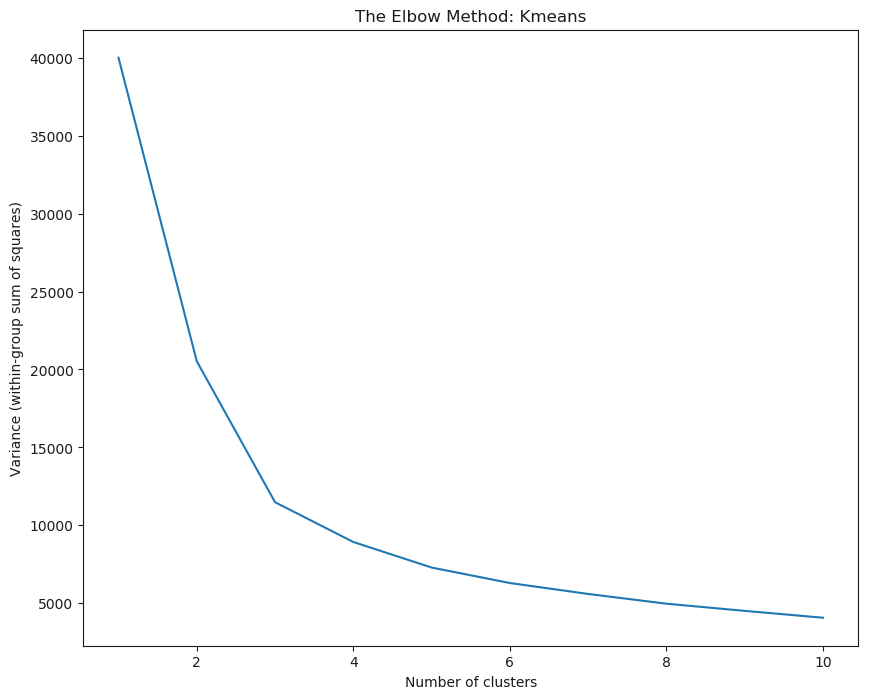

In [31]:
# use a scree plot for determining the correct number of clusters for the data
from sklearn.cluster import KMeans

plt.figure(figsize=(10, 8))
Variance = []
for i in range(1, 11):
    KMeans_cluster = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    KMeans_cluster.fit(df_clus)
    Variance.append(KMeans_cluster.inertia_)
plt.plot(range(1, 11), Variance)
plt.title('The Elbow Method: Kmeans')
plt.xlabel('Number of clusters')
plt.ylabel('Variance (within-group sum of squares)')
plt.show()

In the above scree plot, you can see that the within-group sum of squares variance begins to level off at 3 clusters: the elbow in the graph. This plot confirms what we concluded from varying the number of clusters and calculating the silhouette score for KMeans in the previous section: 3 is the ideal cluster number for KMeans.

#### DBSCAN KNN Graph For Determining eps

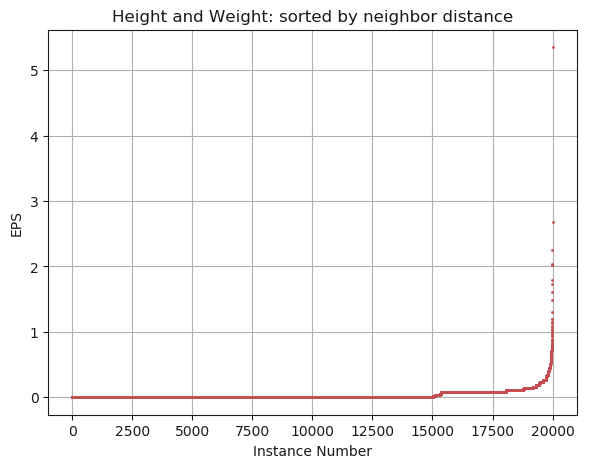

In [32]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
mpts = 10

# create connectivity graphs before calcualting the hierarchy
X_knn_graph = kneighbors_graph(df_clus, mpts, mode='distance') # calculate distance to four nearest neighbors 

N = X_knn_graph.shape[0]
X_4nn_distances = np.zeros((N,1))
for i in range(N):
    X_4nn_distances[i] = X_knn_graph[i,:].max()

X_4nn_distances = np.sort(X_4nn_distances, axis=0)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N), X_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Height and Weight: sorted by neighbor distance')
plt.xlabel('Instance Number')
plt.ylabel('EPS')
plt.grid()

plt.show()

Above is the plot of the K Nearest Neighbors graphs. This plot uses the value of min_samples to calculate the most optimal eps value. The eps value is the point where the graph's slope starts to increase dramatically. The goal is to minimize the slope of the line in the plot because a smaller slope means that the distance between neighbors (clusters) is more consistent.

We used this plot to verify/compare the eps and min_samples values found in parameter tuning. After looking at the silhouette scores for the DBSCAN algorithm in the parameter tuning, an eps of 2 and min_samples of 10 was chosen to be the optimal combination. However, using a min_samples of 10 for this plot, it looks like an optimal eps is between 0.2 and 0.7. This does not agree with our earlier assement. However, we will still use the eps and min_samples found during the parameter tuning because the silhouette score is a more objective measure (vs visually inspecting a graph). 

## Modeling and Evaluation 3

We will visualize each algorithm with some or all of the parameter combinations used in the parameter tuning.

When looking at the silhouette plots, the red line represents the average silhouette score for all the clusters-the visual representation of the silhouette score outputs we have been using. The score can range from -1 to 1, and a negative value means the observation may have been clustered incorrectly. We can easily visualize the observations that were classified incorrectly with these silhouette plots, because they are the part of the graph that extends to the left of 0. Observations closer to 1 have higher silhouette scores and extend to the right of 0. 

The size/shape of the bars in the silhouette plot also indicate the relative size of each cluster. This way we can determine if the clusters are balanced or imbalanced.

The other graphs in this output are the visualizations of the different clusters chosen by the algorithm. The goal of the algorithm is to maximize inter-cluster similarity and minimize similarity between clusters; in essence grouping similar observations together. It is helpful when the clusters are distinct groupings with some separation between groups, but we do not have this with our data. Our data is one exponential shaped blob, but the algorithms will try to separate it out into distinct clusters. We can verify from the silhouette plots whether these clusters are actually good clusters for our data or not.

### Visualize KMeans 

We will be visualizing three parameter combinations that were used in the KMeans parameter tuning for the sake of better understanding the clustering output and algorithm.

Automatically created module for IPython interactive environment
For n_clusters = 2 and initialization k-means++ , The average silhouette_score is : 0.49067727170238884
For n_clusters = 3 and initialization k-means++ , The average silhouette_score is : 0.5124763571840629
For n_clusters = 6 and initialization k-means++ , The average silhouette_score is : 0.45732622255891153


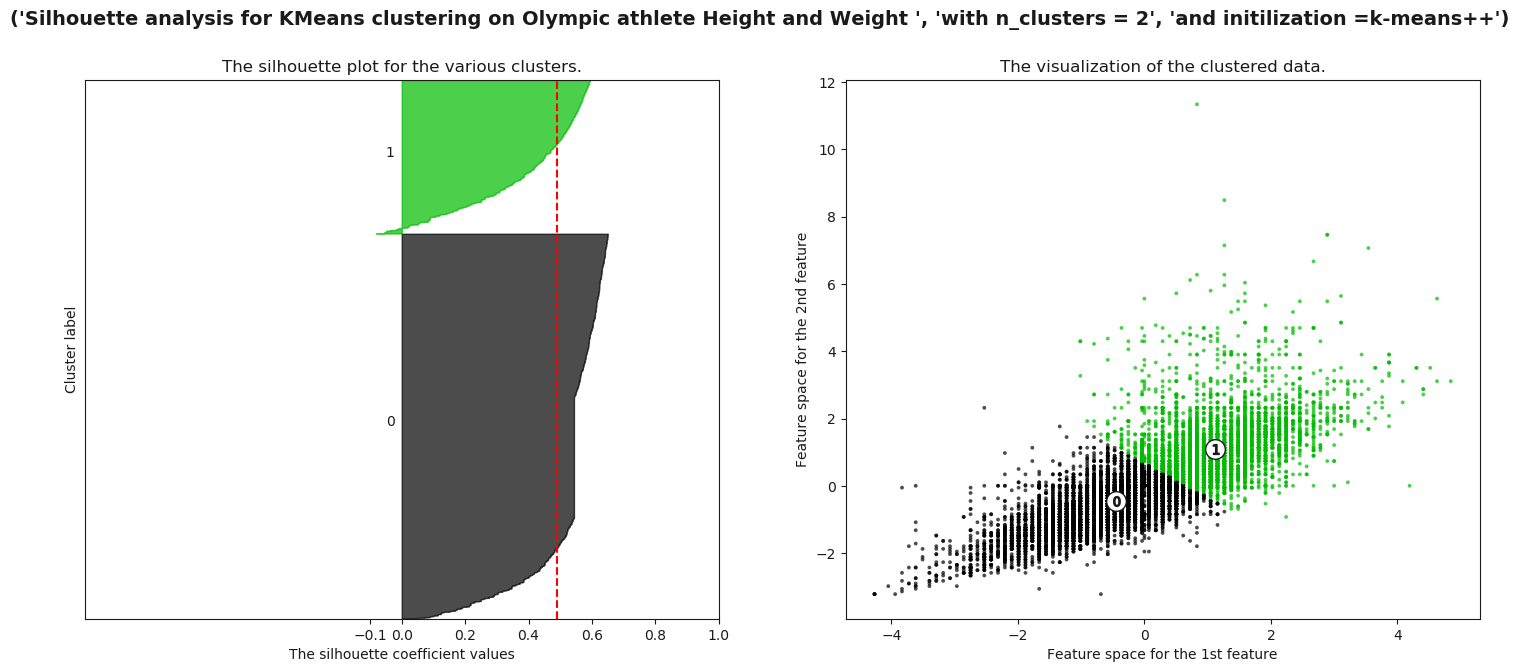

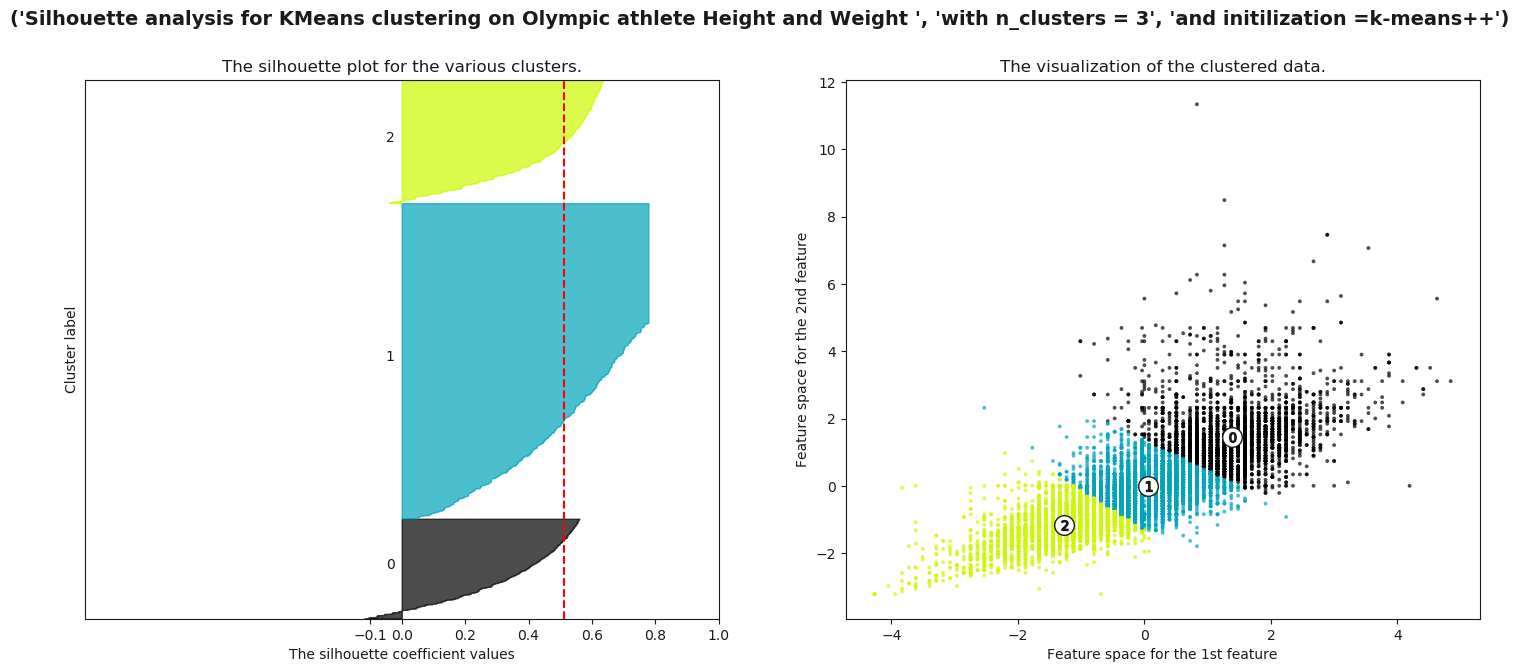

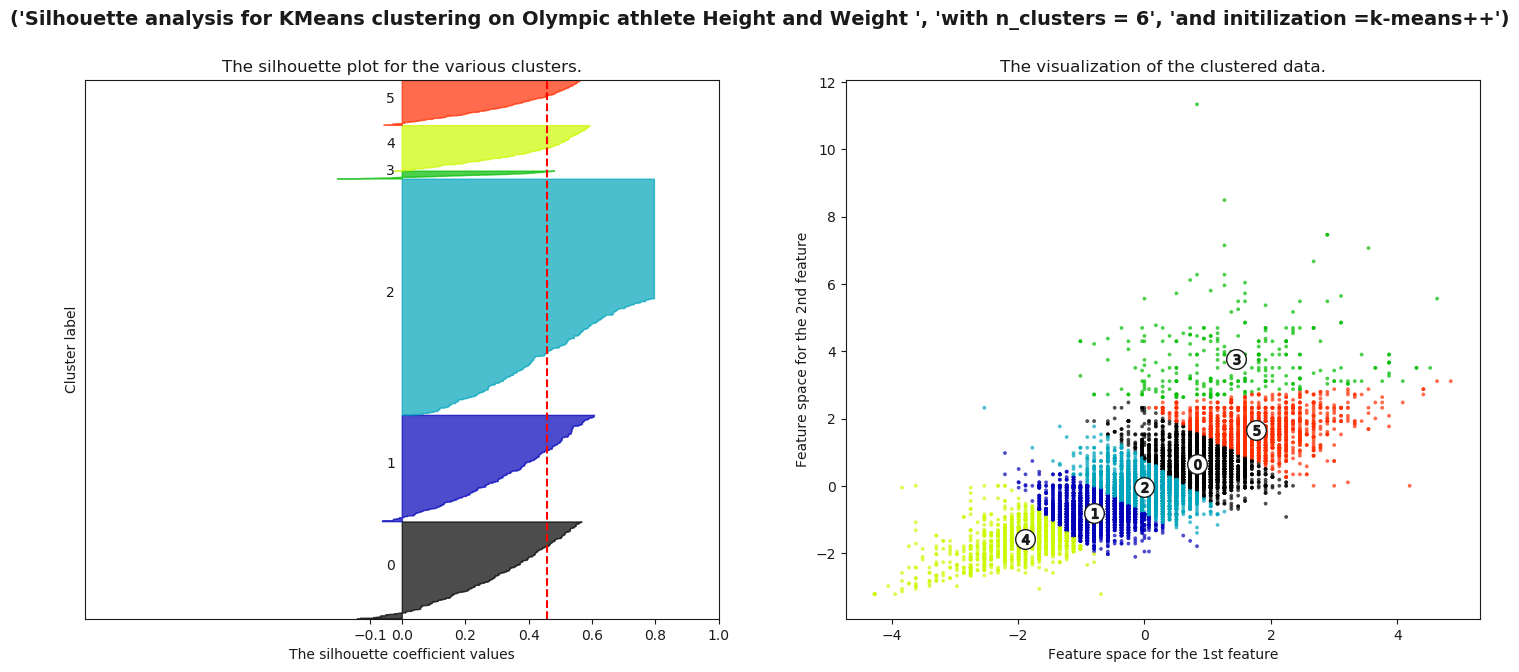

In [40]:
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = [2, 3, 6]
range_init = ['k-means++']

for n_clusters in range_n_clusters:
    for init in range_init:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
            # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(df_clus) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
            # seed to 1 for reproducibility.
        KMeans_cluster = KMeans(n_clusters=n_clusters, random_state=1, init=init)
        cluster_labels = KMeans_cluster.fit_predict(df_clus)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(df_clus, cluster_labels)
        print("For n_clusters =", n_clusters, "and initialization", init,
          ", The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df_clus, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_clus[:, 0], df_clus[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

        # Labeling the clusters
        centers = KMeans_cluster.cluster_centers_
        #Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
               c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on Olympic athlete Height and Weight ",
                     "with n_clusters = %d" % n_clusters , "and initilization =%s" % init), 
                    fontsize=14, fontweight='bold')

plt.show()

Above are the silhouette plots and the clustered data for three of the different n_clusters used for the KMeans algorithm.
We wanted to plot more n_cluster options to better understand how the alogrithm is separating the data. 3 clusters produced the highest silhouette score.

2 clusters: not a terrible clustering, but silhouette score is low
- the average silhouette score is about 0.49 (indicated by the red line on the silhouette plot)
- there are some observations clustered incorrectly in cluster 1, because part of the green graph extends to the left of 0
- the size of the bars in the silhoutte plot show that there are more observations clustered into cluster 0 than cluster 1: clusters are very imbalanced
- the plot of the data with the individual clusters on the right show how the clusters were separated and also show the cluster centers. The clusters are distinct groups with no overlapping and the centers are decently far apart, meaning that the clusters are distict and separable.

3 clusters: slightly less imbalanced clustering with a higher silhouette score
- the average silhouette score is about 0.51 (indicated by the red line on the silhouette plot)
- there are some observations clustered incorrectly in cluster 0 and cluster 2, because parts of the black and lime green graph extend to the left of 0. These observations may be hard to cluster or on the boundary of two clusters, like noise points. This is highly probable considering the amount of noise in our data.
- the size of the bars in the silhoutte plot show that there are more observations clustered into cluster 1 than cluster 2 or 0 but overall the clusters are less imbalanced with 3 clusters. 
- the plot on the right shows that cluster 1 is more dense but does not have as many variations in value (less noise and smaller area, but more observations and more dense).
- the plot of the data with the individual clusters on the right show how the clusters were separated and also show the cluster centers. The clusters are distinct groups with no overlapping and the centers are decently far apart, meaning that the clusters are distict and separable.

6 clusters: more incorrectly clustered observations and a lower silhouette score
- the average silhouette score is about 0.45 (indicated by the red line on the silhouette plot)
- all clusters have incorrectly clustered observations except for cluster 2.  Cluster 2 seems to be the most natural cluster as it is always clustered correctly. 
- as more clusters are used, the algorithm has a harder time clustering the noise into different clusters, which is why we are getting negative silhouette scores for many observations
- the size of the bars in the silhoutte plot show that the clusters are relatively balanced, but there are still more observations in cluster 2 than the other clusters 
- the plot on the right shows that cluster 3 contains many of the far out noise points 
- while the clusters are distinct groups and the cluster centers are not overlapping or on top of each other (as shown by the plot on the right), the algorithm has a hard time correctly clustering all the noise points

### Visualize DBSCAN 

We will be visualizing the DBSCAN algorithm that produced the highest silhouette score.

Automatically created module for IPython interactive environment
For eps = 2 for min_samples = 10 The average silhouette_score is : 0.856831989737317


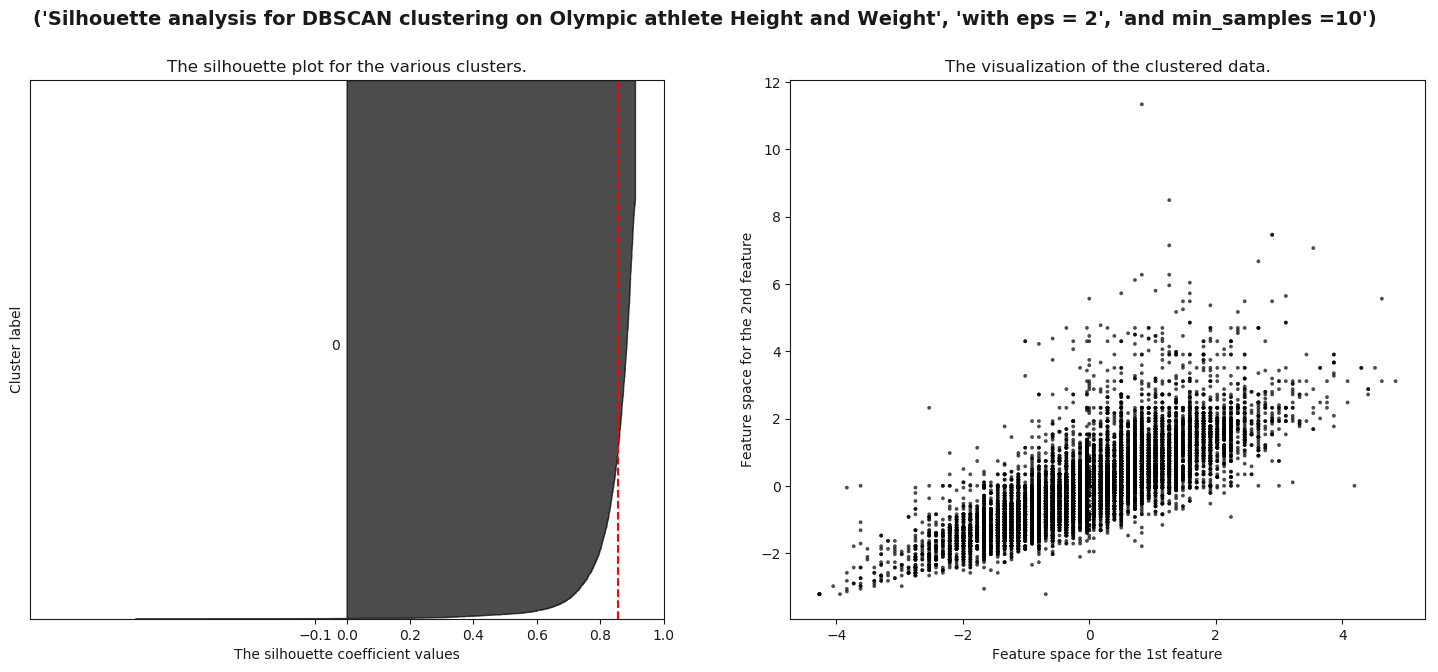

In [38]:
from __future__ import print_function
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

eps_range = [2]
mpts_range = [10]
value = 1 # for graph spacing

for eps in eps_range:
    for mpts in mpts_range:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-1, 1])

        ax1.set_ylim([0, len(df_clus) + (value + 1) * 10])

        DBSCAN_cluster = DBSCAN(eps=eps, metric='euclidean',
        metric_params=None, min_samples=mpts, n_jobs=None, p=None)
        cluster_labels = DBSCAN_cluster.fit_predict(df_clus)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(df_clus, cluster_labels)
        print("For eps =", eps, "for min_samples =", mpts,
          "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df_clus, cluster_labels)

        y_lower = 10
        for i in range(value):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / value)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
        ax2.scatter(df_clus[:, 0], df_clus[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for DBSCAN clustering on Olympic athlete Height and Weight",
                     "with eps = %d" % eps , "and min_samples =%d" % mpts),
                    fontsize=14, fontweight='bold')

plt.show()

Above we visualize the DBSCAN model that produced the highest silhouette score of 0.85. The parameters are eps=2 and min_samples=10. Until now, we have not known how many clusters the DBSCAN algorithm created, because unlike KMeans and Agglomerative Hierarchical clustering, we do not specify the number of clusters we want the algorithm to find. 

It turns out that DBSCAN just created 1 cluster for the data... meaning that the algorithm did not find distinct, separable clusters within the data. This is a very interesting result considering DBSCAN also resulted in the highest sihouette score of all the algorithms. This may mean that this data is not ideal for clustering into distinct groups. 

1 cluster: high silhouette score, but one giant cluster!
- the average silhouette score is about 0.85 (indicated by the red line on the silhouette plot)
- there are no observations clustered incorrectly because there is only one cluster
- the plot of the data on the right shows that only one cluster was created, meaning that the data may not be distict or separable
- DBSCAN is a density based clustering algorith. The result of 1 cluster may mean that all the observations may have similar densities (very tightly packed observations).


### Visualize Agglomerative Hierarchical

We will visualize the two clustering models: one that resulted in the highest silhouette score from the parameter tuning and another to better understand how the agglomerative clustering model works.

Automatically created module for IPython interactive environment
For n_clusters = 3 , affinity = euclidean  and linkage = average . The average silhouette_score is : 0.7839162112817228


Text(0.5,0.98,"('Silhouette analysis for Agglomerative clustering on Olympic athlete Height and Weight', 'with n_clusters = 3', 'and affinity =euclidean', 'and linkage = average')")

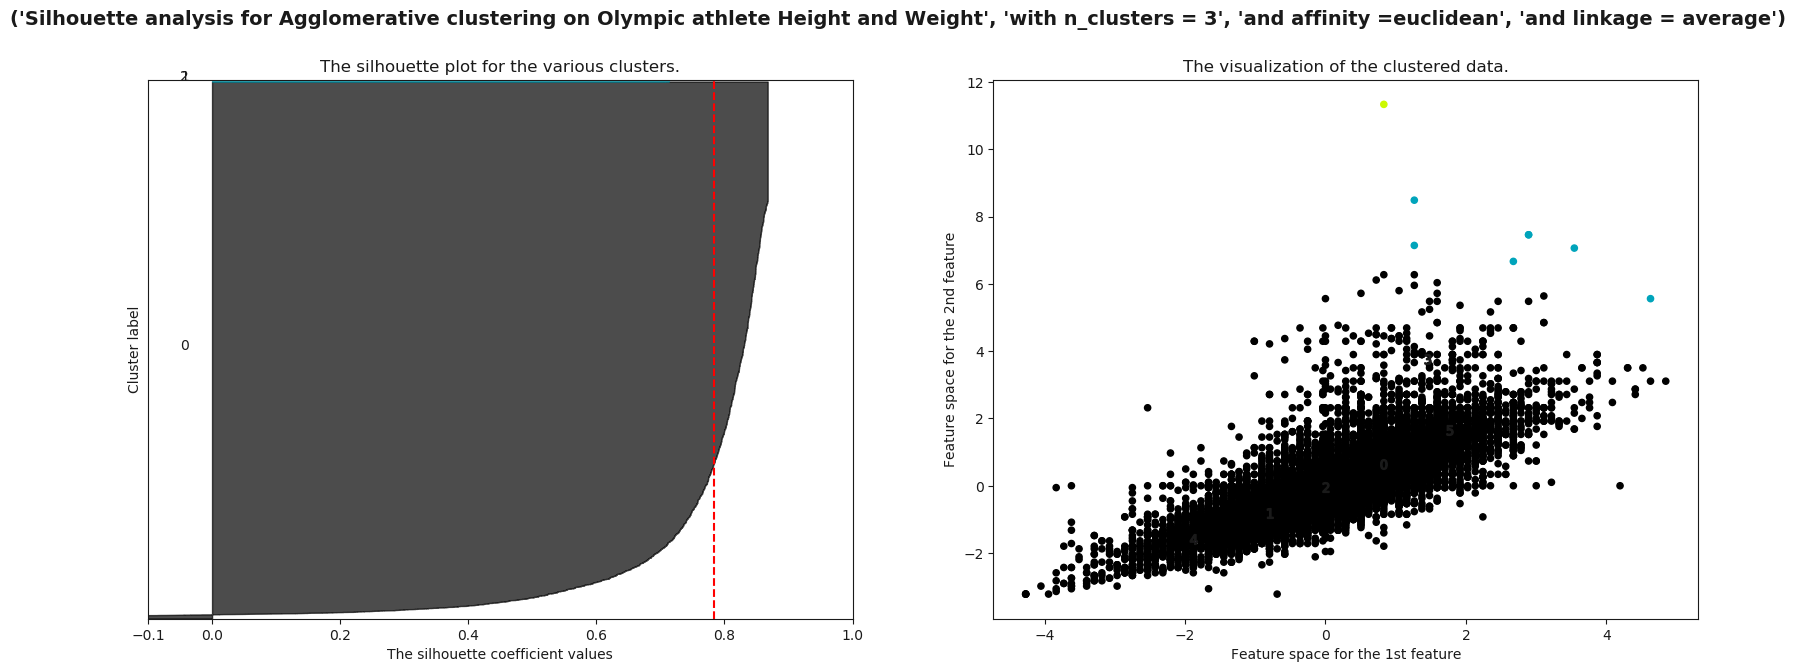

In [41]:
# visualize the euclidean affinity
from __future__ import print_function
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

n_clusters = 3
affinity = 'euclidean'
linkage = 'average'

AGG_cluster = AgglomerativeClustering(affinity=affinity,
                connectivity=None, linkage=linkage, memory=None, n_clusters=n_clusters)
cluster_labels = AGG_cluster.fit_predict(df_clus)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 7)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(df_clus) + (n_clusters + 4) * 10])
silhouette_avg = silhouette_score(df_clus, cluster_labels)

sample_silhouette_values = silhouette_samples(df_clus, cluster_labels)

silhouette_avg = silhouette_score(df_clus, cluster_labels)
print("For n_clusters =", n_clusters, ", affinity =", affinity, " and linkage =", linkage,
                ". The average silhouette_score is :", silhouette_avg)
y_lower = 10
for i in range(n_clusters): 
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(df_clus[:, 0], df_clus[:, 1], s=20,c=colors)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for Agglomerative clustering on Olympic athlete Height and Weight",
                "with n_clusters = %d" % n_clusters , "and affinity =%s" % affinity, "and linkage = %s" %linkage),
                fontsize=14, fontweight='bold')

Above is the visualization of the agglomerative hierarchical clustering algorithm with 3 clusters, affinity=euclidean, and linkage=average. This is one of the agglomerative hierarchical models that achieved the highest average silhouette score of 0.78. The other model had a affinity=l2, but we are just visualizing one because they both produced the exact same results.

3 clusters: very imbalanced clustering but with a high silhouette score
- the average silhouette score is about 0.78 (indicated by the red line on the silhouette plot)
- there are some observations clustered incorrectly in cluster 0, because part of the black graph extends to the left of 0. These observations may be hard to cluster or on the boundary of two clusters, like noise points. This is highly probable considering the amount of noise in our data.
- the size of the bars in the silhouette plot are very interesting. there are so few obserations in the other two clusters that they do not even show up as bars on the silhouette plot. The clusters are highly imbalanced with all but 7 observations belonging in cluster 0. 
- the plot on the right shows that cluster 0 contains all but 7 observations. the dots for the other two clusters are essentially just the algorithm clustering the noise outliers.
- overall this is not a good clustering because there are really not 3 distinct clusters, just one cluster comprised of most of the data and two other clusters containing noise points. In fact, one cluster only contains 1 observation! This is not an ideal clustering model.

Automatically created module for IPython interactive environment
For n_clusters = 3 , affinity = l1  and linkage = average . The average silhouette_score is : 0.6498394805569327


Text(0.5,0.98,"('Silhouette analysis for Agglomerative clustering on Olympic athlete Height and Weight', 'with n_clusters = 3', 'and affinity =l1', 'and linkage = average')")

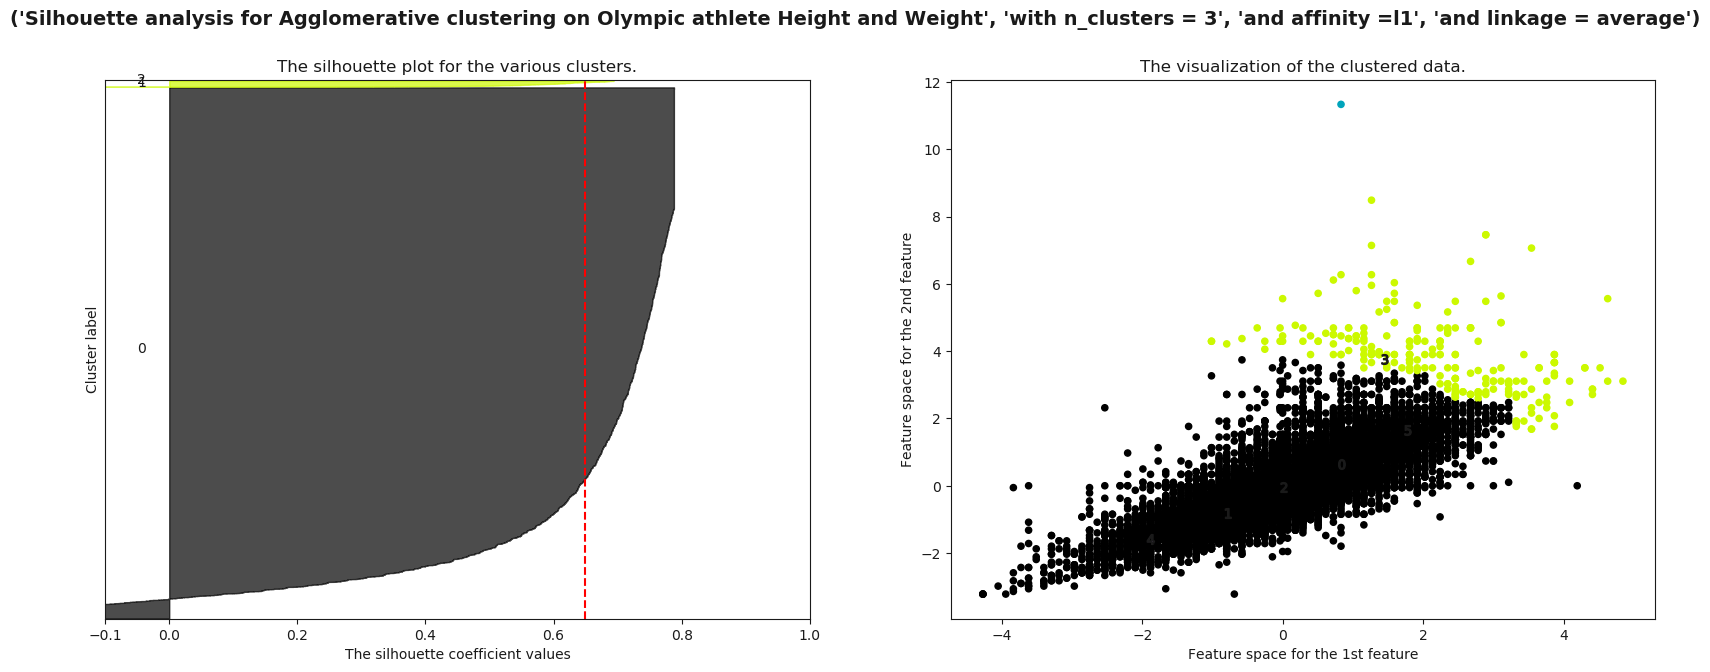

In [42]:
# visualize the l1 affinity
from __future__ import print_function
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

n_clusters = 3
affinity = 'l1'
linkage = 'average'

AGG_cluster = AgglomerativeClustering(affinity=affinity,
                connectivity=None, linkage=linkage, memory=None, n_clusters=n_clusters)
cluster_labels = AGG_cluster.fit_predict(df_clus)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 7)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(df_clus) + (n_clusters + 4) * 10])
silhouette_avg = silhouette_score(df_clus, cluster_labels)

sample_silhouette_values = silhouette_samples(df_clus, cluster_labels)

silhouette_avg = silhouette_score(df_clus, cluster_labels)
print("For n_clusters =", n_clusters, ", affinity =", affinity, " and linkage =", linkage,
                ". The average silhouette_score is :", silhouette_avg)
y_lower = 10
for i in range(n_clusters): 
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(df_clus[:, 0], df_clus[:, 1], s=20,c=colors)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for Agglomerative clustering on Olympic athlete Height and Weight",
                "with n_clusters = %d" % n_clusters , "and affinity =%s" % affinity, "and linkage = %s" %linkage),
                fontsize=14, fontweight='bold')

Above we visualize one of the agglomerative hierarchical clustering models that did not produce the highest silhouette score, but we want to see how the clustering in the model is actually working. This model has the parameters n_clusters = 3, affinity =l1, and linkage = average. The average silhouette score is 0.649.

3 clusters: still very imbalanced clustering, with a lower silhouette score, but the clustering makes more sense
- the average silhouette score is about 0.649 (indicated by the red line on the silhouette plot)
- there are some observations clustered incorrectly in cluster 0, because part of the black graph extends to the left of 0. These observations may be hard to cluster or on the boundary of two clusters, like noise points. This is highly probable considering the amount of noise in our data.
- in this silhouette plot we can actually see the cluster 1 bar (lime green), because it finally has enough observations! The clusters are still very imbalanced.
- the plot on the right shows that cluster 0 contains the majority of the observations, while cluster 1 contains some of the high right noise points and cluster 2 contains a single outlier observation
- even though this algorithm produced a lower silhouette score, the clustering make more sense, which is why we chose to visualize the output
- is also interesting to see the overlapping of cluster 0 observations on top of cluster 1 observations, meaning that this model is not able to separate the data into distinct, separable clusters... not a good model!

## Modeling and Evaluation 4
### Summarize Results
#### Examine the individual cluster contents and discuss overal clustering conclusion

#### Examine Mean Height and Weight Values for KMeans Clusters

In [43]:
# set up and fit the best KMeans model
n_clusters=3
init='k-means++'
KMeans_cluster = KMeans(n_clusters=n_clusters, random_state=1, init=init)
cluster_labels = KMeans_cluster.fit_predict(df_clus)

# save the cluster labels to a new df
cluster_Hierarchical = pd.DataFrame(cluster_labels)

# create new df to hold the cluster lables and the original Height and Weight attributes
check = Clus_Var # use the df before it was scaled... so the numbers make sense
check['cluster'] = cluster_Hierarchical

# Calculate mean of clusters
mean_of_clusters = pd.DataFrame(round(check.groupby('cluster').mean(),1))
mean_of_clusters

,Height,Weight
cluster,,
0.0,174.6,69.8
1.0,175.9,71.4
2.0,174.7,70.4


Here we examine what the mean height and weight observations for each individual cluster using the KMeans model that produced the highest silhouette score. 

Cluster 0 has the lowest average weight and cluster 1 has the highest average weight. 
Cluster 2 and cluster 0 have almost identical average heights (0.01 difference). 

Overall, these clusters do not contain very different values: all the mean heights and weights of the clusters are very similar.
This again hints that this data does not make sense for clustering: there is no clear separation between height and weight.

#### Examine Mean Height and Weight Values for DBSCAN Clusters

In [44]:
# set up and fit the best DBSCAN model
eps = 2
mpts = 10

DBSCAN_cluster = DBSCAN(eps=eps, metric='euclidean',
    metric_params=None, min_samples=mpts, n_jobs=None, p=None)
cluster_labels = DBSCAN_cluster.fit_predict(df_clus)

# save the cluster labels to a new df
cluster_Hierarchical = pd.DataFrame(cluster_labels)

# create new df to hold the cluster lables and the original Height and Weight attributes
check = Clus_Var # use the df before it was scaled... so the numbers make sense
check['cluster'] = cluster_Hierarchical

# Calculate mean of clusters
mean_of_clusters = pd.DataFrame(round(check.groupby('cluster').mean(),1))
mean_of_clusters

,Height,Weight
cluster,,
0.0,175.4,70.9


Here we examine what the mean height and weight observations using the DBSCAN model that produced the highest silhouette score. 

As we witnessed with our previous visualization, DBSCAN only created one cluster. 
The mean height and weight values are merely the mean of those attributes in the actual clustering data set.
This clustering technique does not reveal any new information about the data, which again leads us to the conclusion that this data does not make sense for clustering: there is no clear separation between height and weight.

#### Examine Mean Height and Weight Values for Agglomerative Hierarchical Clusters

In [46]:
# set up and fit the best agglomerative hierarchical model
AGG_cluster = AgglomerativeClustering(affinity='l1',
                connectivity=None, linkage='average', memory=None, n_clusters=3)
cluster_labels = AGG_cluster.fit_predict(df_clus)

# save the cluster labels to a new df
cluster_Hierarchical = pd.DataFrame(cluster_labels)

# create new df to hold the cluster lables and the original Height and Weight attributes
check = Clus_Var # use the df before it was scaled... so the numbers make sense
check['cluster'] = cluster_Hierarchical

# Calculate mean of clusters
mean_of_clusters = pd.DataFrame(round(check.groupby('cluster').mean(),1))
mean_of_clusters

,Height,Weight
cluster,,
0.0,175.4,70.9
2.0,173.1,69.8


Here we examine what the mean height and weight observations for each individual cluster using the Agglomerative model that produced the highest silhouette score. 

Cluster 2 has the lowest average height and cluster 0 has the highest average height. 
Cluster 2 and 0 have almost identical mean weights (1.1 difference).
Not sure why clustering averages are not showing up in the output for cluster 1, possibly because the cluster only contains one observation as witnessed in the visualization for the agglomerative hierarchical model. 

Overall, these clusters do not contain very different values: the mean heights and weights of the clusters are very similar.
This again hints that this data does not make sense for clustering: there is no clear separation between height and weight.

#### Overall Conclusion

After performing clustering on a subsample of the Olymic athlete Height and Weight attributes, we got mixed, misleading, and very interesting results.

We trained and evaluated the three different clustering models (KMeans, DBSCAN, and Agglomerative Hierarchical) on the scaled Height and Weight attributes and evaluated the models using the silhouette score, an internal validation metric. KMeans resulted in the worst silhouette score, DBSCAN with the best silhouette score, and Agglomerative Hierarchical coming in second best for silhouette score. Although we produced the highest/best silhouette score for DBSCAN at 0.85, it ended up being a misleading metric!

After plotting the DBSCAN algorithm, we realized that the alogrithm clustered the data into one giant cluster, in essence not clustering the data at all. Since our best silhouette score was a result of not truely separating the data, we realized that this data may not actually be good for clustering. It turns our that it does not make a lot of sense to cluster the Olympic athlete Height and Weight because there is no clear separation between these attributes and no separable groups are formed. Also, because DBSCAN is a density based algorithm and because the majority of the observations are very densely grouped (there is not a large amount of variation in Olympic athlete Height and Weight), it makes sense that the DBSCAN algorithm interprets the data as one cluster. 

We verified our conclusion when we examined the mean values for the Height and Weight attributes in each of the clusters for each model. They all presented the same result: the average values for height and weight do not vary signficantly across clusters. Even though KMeans and Agglomerative Hierarchical clustering were able to separate the clusters out into distinct groups, there is no real difference in the average height and weight values in the clusters. 

In essense, just using a silhouette score to validate a cluster is not enough information. If we had not plotted the DBSCAN algorithm, we would not have realized the silhouette score was a little misleading. If the sole desire was to separate the clusters into distinct groups, it would be better to use the KMeans alogirthm even though it has a lower average silhouette score. This was an interesting result from our analysis because it demonstrated that a data scientist must evaluate their models in multiple ways to truely understand how the model is performing. Looking at a metric is not sufficient and can be misleading. In our case, we needed to evaluate the models with the silhoutte score, then visualize the results, THEN examine the individual cluster means to really understand how each model was performing.

The goal of clustering is to make sense of unlabeled data and try to organize the data to understand the data and use the cluster labels to make new inferences on the data. When we used clustering on our Height and Weight attributes, there were no new inferences to be made. Not all data is fit for clustering or has any type of natural or distinct separable form. This was another very interesting result from our analysis: sometimes it just doens't make sense to cluster certain data and you don't learn anything new from clustering it. 

## Deployment

"I have not failed.  I have just found 10,000 ways that will not work." - Thomas Edison

The above quote is appropriate for summing up our results from this clustering analysis.

The team set out to better understand the Olympic data set in particular as it relates to the Height and Weight continuous variables in the data set. Perhaps an unsupervised machine learning algorithm would be able to predict useful labels for the data! The methodology utilized was clustering using three different models: KMeans, DBSCAN, and Agglomerative Hierarchical.  What the team found is relevant: clustering does not make sense when trying to better understand Height and Weight data associated with Olympic athletes over the past 100+ years!

So, the question remains, of what use is the modelling and related results to our potential interested stakeholders?  For starters, the team can confidently conclude that there does not seem to be any new insights or inferences to be reached when using clustering models on the Height and Weight data.  Any inferences to be reached with this data must be achieved using other models. This is especially relevant as the stakeholders (our presumed client) appreciate the team's request for additional resourcing in order to expand upon the utilized data set.  While Height and Weight variables may not have shown new patterns of relation, other continuous variables in the future may fare differently.  

Although the team did not find highly insightful clustering results, lessons were learned and the data set is still able to be better understood than before. This is an important findng in and of itself. Much of the work around data science centers around trial and error - inferences to hypotheses to statistical testing and back around again.  The intention of running a model such as clustering is to gain insight into the data; to gather new inferences.  If a clustering model does not produce any meaningful new inferences, then the next step is to try a different model or get different data.

The team can report to the stakeholders that "you are welcome in that we showed that clustering does not illuminate any new relationships with the Height and Weight data, but we are now very familiar with building, training and evaluating clustering algorithms". The clustering models devloped in this analysis are highly useful for clustering data and visualizing the results, just not necessarily for the Olympic Height and Weight data. However, the models can be used on any other data that the stakeholders would like, and the variation in algorithms will allow the stakeholders to see which algorithm performs best on the data. To deploy this model, all one would need to do is to run the algorithms on the data, visualize the results, and compare the mean values of the individual clusters. This analysis is a very useful end to end structure for a robust clustering analysis.

It would be interesting to collect additional data on Olympic athletes and cluster that data. Perhaps more meaningful results would be found. Additional data that the team would be interested in analyzing are below: 

A. GDP by country by games
B. Population by country by games
C. Deadlift results by athlete by games

The last request may produce a quizzical look from our stakeholders.  However, ample research in this area has already established a potential need for this data.  Here is a sample.

https://www.naseinc.com/blog/predictors-of-athletic-performance/

Overall, the results of this modeling would likely be delivered via powerpoint with the provision of work files (such as this document).  As the model deployed with this data did not produce any new relevant insights, it would likely not be needed for updating (unless there were changes in the underlying data).  Of course, along those lines, clustering models may not typically be selected for production phase in any case.  

## Exceptional Work

### Exceptional Work 1

For the exceptional work section, we will perform KMeans clustering with 3 clusters on the Height and Weight attributes and then add the resulting cluster labels to the data set. We are using KMeans because although it was not our best performing clustering algorithm, it is our favorite! 

We will first perform a random forest classification (parameters chosen from parameter tuning in the previous lab) on the original data set with the Height and Weight attributes and then drop the Height and Weight attributes and perform a random forest classification on the data set with the KMeans cluster labels. 

We will be comparing accuracy and F1 Score to see which data set performs better on predicting the target variable, IsMedal (whether an athlete won a medal or not).

In [47]:
# select the features to cluster on and select a random subsample from the dataset

from sklearn.preprocessing import StandardScaler

sample_size=20000
Var = ['Height','Weight']
data = df.sample(n=sample_size, random_state=1)
clus_data = data[Var]
data_drop = data.drop(['Height','Weight'], axis=1)

# scale the features since they have different units
scl_obj = StandardScaler()
scl_obj.fit(clus_data)
clus_data2 = scl_obj.transform(clus_data)

# ensure you have the desired number of observations
print(clus_data2.shape)
print(data.shape)
print(data_drop.shape)

(20000, 2)
(20000, 303)
(20000, 301)


In [48]:
# cluster on the data and replace Height and Weight features with the cluster labels as a form of discretization

from sklearn.cluster import KMeans

# perform KMeans clustering
range_n_clusters = [3]
range_init = ['k-means++']

for n_clusters in range_n_clusters:
    for init in range_init:
        KMeans_cluster = KMeans(n_clusters=n_clusters, random_state=1, init=init)
        cluster_labels = KMeans_cluster.fit_predict(clus_data2)

# save the cluster labels to a new df
cluster_Hierarchical = pd.DataFrame(cluster_labels)

# name the column of the new df and view it
cluster_Hierarchical.columns=['labels']
cluster_Hierarchical.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [49]:
# view the counts of the different clusters
cluster_Hierarchical['labels'].value_counts()

1    11724
2     4569
0     3707
Name: labels, dtype: int64

Cluster 2 and 0 have a similar number of observations, while cluster 1 has about 3X as many observations as the other two clusters.

In [50]:
# check for NaN cluster labels and enure the df's to combine are the same shape
print(pd.isna(cluster_Hierarchical['labels']).sum())
print(cluster_Hierarchical.shape)
print(data_drop.shape)

0
(20000, 1)
(20000, 301)


The dataframe shapes are what we are expecting and there are no missing cluster labels. Always good to double check!

In [51]:
# combine the cluster labels with the df that does not contain the Height or Weight attributes and check for NaN
data_drop['cluster_label']=cluster_Hierarchical.iloc[:,0].values
print(pd.isna(data_drop['cluster_label']).sum())

0


There are no missing cluster labels.

In [52]:
# look at the new cluster feature and ensure the cluster counts were preserved after combining
data_drop['cluster_label'].value_counts()

1    11724
2     4569
0     3707
Name: cluster_label, dtype: int64

The cluster counts are the same in the new df!

In [53]:
# view the data set with the clustering label and no Height or Weight attributes
data_drop.head()

,Age,Year,IsMedal,IsMale,IsSummer,NOC_AFG,NOC_AHO,NOC_ALB,NOC_ALG,NOC_AND,...,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,cluster_label
87425,26.0,1968,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
232882,36.0,2010,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
108037,33.0,2004,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
249841,26.0,1964,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
140123,27.0,1960,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set up CV object with 10 folds of cross validation and 80-20 training testing split
# Using Stratified Shuffle Split since our data is imbalanced (many more nonmedalists than medalists)
# set the seed for reproducible results

num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
print(cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None)


In [55]:
# run the data set without the cluster label through the ML algorithm (data has original Height and Weight attributes)
    # compare the results with the performance of the same model with the cluster label
# RF model: our best performing model from the last lab

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# create X1 and y1 from the data
if 'IsMedal' in data:
    y1 = data['IsMedal'].values # get the labels we want  
    X1 = data.loc[:, data.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

accuracy=[] # set up an empty array to hold your accuracy values to from each CV iteration
F1SCORE=[] # set up an empty array to hold your f1 scores to from each CV iteration
for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # calculate the accuracy and f1 scores
    acc = mt.accuracy_score(y1_test,y1_hat)
    accuracy.append(acc)
    #conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    F1SCORE.append(f1)
    
print("The average accuracy is\n", round(np.mean(accuracy),2))
print("The average F1 score is\n", round(np.mean(F1SCORE),2))

The average accuracy is
 0.71
The average F1 score is
 0.37


In [56]:
# run the data set with the cluster label through the ML algorithm
    # compare the results with the performance of the same model without the cluster label
# RF model: our best performing model from the last lab

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# create X1 and y1 from the data
if 'IsMedal' in data_drop:
    y1 = data_drop['IsMedal'].values # get the labels we want  
    X1 = data_drop.loc[:, data_drop.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

accuracy=[] # set up an empty array to hold your accuracy values to from each CV iteration
F1SCORE=[] # set up an empty array to hold your f1 scores to from each CV iteration
for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # calculate the accuracy and f1 scores
    acc = mt.accuracy_score(y1_test,y1_hat)
    accuracy.append(acc)
    #conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    F1SCORE.append(f1)
    
print("The average accuracy is\n", round(np.mean(accuracy),2))
print("The average F1 score is\n", round(np.mean(F1SCORE),2))

The average accuracy is
 0.71
The average F1 score is
 0.37


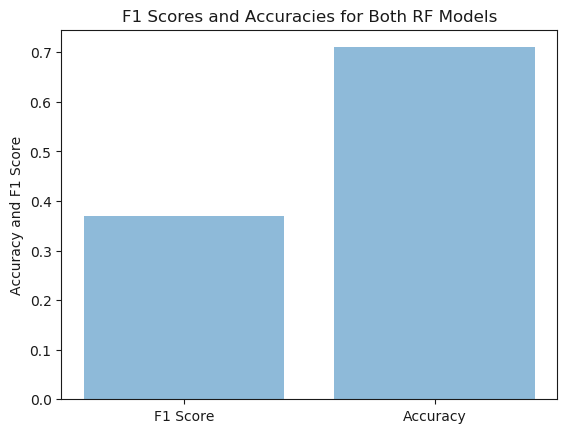

In [57]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ['F1 Score', 'Accuracy']
y_pos = np.arange(len(objects))
performance = [0.37,0.71]

plt.bar(y_pos,performance,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy and F1 Score')
plt.title('F1 Scores and Accuracies for Both RF Models')
 
plt.show()

Results:
After running the Random Forest classifier on the two data sets with IsMedal as the target variable, we achieved the exact same accuracy and F1 scores. From 10 fold cross validation, both models have an average accuracy of 71% and an average F1 Score of 0.37. Remember that accuracy is at its highest at 100% and the F1 score is considered perfect at 1. While the models have a decently high accuracy, the F1 score is low, meaning that the model may just be predicting the majority class (IsMedal=0). This is not a good model. 

And because the two models achieved the same performance, it may mean that the cluster label and the Height and Weight attributes are not significantly used by the model for predicting the IsMedal target. It looks like the model doesn't care whether the Height and Weight values were clusterd into three groups or if the actual Height and Weight features are in the model. Height and Weight seem to have low predictive power for prediciting the IsMedal target. 

### Exceptional Work 2

We would also like to be awarded exceptional points for all the awesome visualizatIons that we included in the visualize attributes section. We included many visualizations, and we also included a super awesome interactive heat map of the world that  shows the total medal count per country. We also went in depth in our visualization intrepretations and explanations. 

We also provided ample commentary and discussion on all our clustering model results and included fun pictures from the Olympics.  

We would also like exceptional points for using a KNN graph to verify the eps and min_sample parameters for the DBSCAN model and for using the Elbow Plot to verify the optimal number of clusters for KMeans.

## THANKS FOR A GREAT SEMESTER! :)